## DEFCON Classification of the Security Situation

In [2]:
# !pip install git+https://github.com/tensorflow/docs

<center><img src="https://raw.githubusercontent.com/dhp6106/insaid-projects/master/AI_Foundation/DEFCON-Multiclass/DEFCON_Levels.jpg?raw=true" width="600" height="500" /></center>

- Military conflict is an intense state of violence.
     - In such situations, it is crucial for a nation to stay alert, cope with it, and mitigate its implications.
- A country has set up the DEFCON (Defense Readiness Condition) warning system.
    - This alert system is used to gauge the level of alertness of the defense forces.
    - It consists of five levels of readiness for the military forces to be prepared for the consequences of the conflict.
    - The DEFCON system allows the nation’s forces to be a step ahead of its rivals.
- We are given a synthesized data that can be used to build a model that can accurately predict the DEFCON level raised as a result of the conflict.
- The data is present in a single csv file:
    - defcon_level.csv - Dataset consisting of approximately 10,000 data samples.

| Column | Description |
|:------ |:----------  |
| Allied_Nations | The number of nations that have joined together as allies. |
| Diplomatic_Meetings_Set | The number of meetings with the intent to resolve the conflict that is planned. |
| Percent_Of_Forces_Mobilized  | The percentage of forces mobilized. |
| Hostile_Nations | The number of enemy nations that have allied together. |
| Active_Threats | The number of situations or threats that require immediate attention. |
| Inactive_Threats | The number of situations or threats being monitored for activity or escalation. |
| Citizen_Fear_Index | The percentage of citizens who fear catastrophic military conflicts. |
| Closest_Threat_Distance(km) | The closest threat to the border of the country in question. |
| Aircraft_Carriers_Responding | The number of aircraft carriers actively traveling towards a threat to neutralize it.|
| Troops_Mobilized(thousands) | The number of troops that are activated and responding to the threats being the most. |
| DEFCON_Level | A numeric scale of conflict 'seriousness' with 1 being the least serious and 5 being the most. (target variable)|
| ID | An ID to aid a checker script.|

### Objective:
- This dataset is intended for multi-class classification tasks.
- Use this data set to train a model able to classify the different DEFCON levels based on certain conditions.

### Import Required libraries  

Installing or updating Tensorflow binaries and ignore warnings for the notebook

In [3]:
#!pip install -U tensorflow

import warnings
warnings.filterwarnings('ignore')

Importing basic libraries for initial Data analysis and prepration 

In [4]:
import timeit
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
# from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler as ss
from sklearn.preprocessing import Normalizer as norm
%matplotlib inline
import os

As we would use the Deeplearning model for this notebook, importing required libraries and packages

In [5]:
import tensorflow as tf
print(tf.version.VERSION)
import tensorflow.keras.utils as kutils

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization, ELU, ReLU
from tensorflow.keras.optimizers import SGD,Adam,RMSprop
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ReduceLROnPlateau as RLRP
from tensorflow.keras.callbacks import EarlyStopping as ES
from tensorflow.keras.callbacks import LearningRateScheduler as lrSch
from tensorflow.keras.callbacks import ModelCheckpoint as MCP
# from imblearn.keras import balanced_batch_generator

import tensorflow_docs as tfdocs
import tensorflow_docs.plots as tfplots
import tensorflow_docs.modeling as tfmodeling


2.2.0


Loading the data for the given project from github location into a pandas dataframe.

In [6]:
train_file_path = "https://raw.githubusercontent.com/dhp6106/insaid-projects/master/AI_Foundation/DEFCON-Multiclass/defcon_level.csv"

In [7]:
train = pd.read_csv(train_file_path)

In [8]:
print(train.info())
display(train)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
Allied_Nations                  10000 non-null int64
Diplomatic_Meetings_Set         10000 non-null int64
Percent_Of_Forces_Mobilized     10000 non-null float64
Hostile_Nations                 10000 non-null int64
Active_Threats                  10000 non-null float64
Inactive_Threats                10000 non-null float64
Citizen_Fear_Index              10000 non-null float64
Closest_Threat_Distance(km)     10000 non-null float64
Aircraft_Carriers_Responding    10000 non-null int64
Troops_Mobilized(thousands)     10000 non-null float64
DEFCON_Level                    10000 non-null int64
ID                              10000 non-null int64
dtypes: float64(6), int64(6)
memory usage: 937.6 KB
None


Allied_Nations  Diplomatic_Meetings_Set  Percent_Of_Forces_Mobilized  \
0                 16                        1                         0.67   
1                  8                        1                         0.11   
2                  9                        1                         0.49   
3                  7                        0                         0.30   
4                  8                        1                         0.12   
...              ...                      ...                          ...   
9995              11                        1                         0.49   
9996              10                        0                         0.52   
9997               7                        1                         0.13   
9998              10                        1                         0.42   
9999               8                        1                         0.24   

      Hostile_Nations  Active_Threats  Inactive_Threats  Citizen_Fear_Index  \
0                   3             6.0              25.0            0.787812   
1                   2            38.0              48.0            0.419236   
2                   3            32.0              69.0            0.582232   
3                   2            31.0              52.0            0.589574   
4                   5            13.0              42.0            0.552863   
...               ...             ...               ...                 ...   
9995                5             5.0              13.0            0.919971   
9996                2            14.0              28.0            0.433921   
9997                2            25.0              42.0            0.470631   
9998                2            21.0              84.0            0.662996   
9999                2            15.0             105.0            0.423642   

      Closest_Threat_Distance(km)  Aircraft_Carriers_Responding  \
0                          324.36                             1   
1                          359.34                             0   
2                          332.84                             1   
3                          358.28                             1   
4                          364.64                             0   
...                           ...                           ...   
9995                       329.66                             1   
9996                       348.74                             1   
9997                       366.76                             1   
9998                       348.74                             1   
9999                       355.10                             1   

      Troops_Mobilized(thousands)  DEFCON_Level     ID  
0                        862400.0             3   7570  
1                        959200.0             4  12128  
2                        836000.0             3   2181  
3                        924000.0             3   5946  
4                        968000.0             2   9054  
...                           ...           ...    ...  
9995                    1029600.0             4  11493  
9996                    1047200.0             3    305  
9997                     941600.0             3    612  
9998                     836000.0             2   4963  
9999                     862400.0             2   9387  

[10000 rows x 12 columns]

In [9]:
train = train.astype(np.float32)
train.describe()

Allied_Nations  Diplomatic_Meetings_Set  Percent_Of_Forces_Mobilized  \
count    10000.000000             10000.000000                 10000.000000   
mean         8.317800                 0.524100                     0.270549   
std          1.748807                 0.500237                     0.196435   
min          5.000000                 0.000000                     0.000000   
25%          7.000000                 0.000000                     0.090000   
50%          8.000000                 1.000000                     0.260000   
75%          9.000000                 1.000000                     0.430000   
max         16.000000                 2.000000                     1.000000   

       Hostile_Nations  Active_Threats  Inactive_Threats  Citizen_Fear_Index  \
count     10000.000000    10000.000000      10000.000000        10000.000000   
mean          2.502300       15.754300         46.534599            0.486640   
std           1.311749       10.388883         34.012699            0.134552   
min           1.000000        1.000000          6.000000            0.000000   
25%           2.000000        7.000000         21.000000            0.406021   
50%           2.000000       13.000000         37.000000            0.486784   
75%           3.000000       21.000000         62.000000            0.567548   
max          16.000000       72.000000        289.000000            1.000000   

       Closest_Threat_Distance(km)  Aircraft_Carriers_Responding  \
count                 10000.000000                  10000.000000   
mean                    350.884979                      0.891300   
std                      16.285755                      0.329098   
min                     290.440002                      0.000000   
25%                     340.260010                      1.000000   
50%                     350.859985                      1.000000   
75%                     360.399994                      1.000000   
max                     425.059998                      2.000000   

       Troops_Mobilized(thousands)  DEFCON_Level            ID  
count                 1.000000e+04  10000.000000  10000.000000  
mean                  9.174873e+05      2.616600   6266.558594  
std                   9.271836e+04      0.802789   3610.168945  
min                   7.392000e+05      1.000000      2.000000  
25%                   8.360000e+05      2.000000   3139.750000  
50%                   8.976000e+05      3.000000   6280.500000  
75%                   9.768000e+05      3.000000   9391.500000  
max                   1.311200e+06      5.000000  12500.000000

In [10]:
train = train.drop(['ID'], axis=1)
train.groupby(['DEFCON_Level']).aggregate('count')

Allied_Nations  Diplomatic_Meetings_Set  \
DEFCON_Level                                            
1.0                      498                      498   
2.0                     4270                     4270   
3.0                     3910                     3910   
4.0                     1212                     1212   
5.0                      110                      110   

              Percent_Of_Forces_Mobilized  Hostile_Nations  Active_Threats  \
DEFCON_Level                                                                 
1.0                                   498              498             498   
2.0                                  4270             4270            4270   
3.0                                  3910             3910            3910   
4.0                                  1212             1212            1212   
5.0                                   110              110             110   

              Inactive_Threats  Citizen_Fear_Index  \
DEFCON_Level                                         
1.0                        498                 498   
2.0                       4270                4270   
3.0                       3910                3910   
4.0                       1212                1212   
5.0                        110                 110   

              Closest_Threat_Distance(km)  Aircraft_Carriers_Responding  \
DEFCON_Level                                                              
1.0                                   498                           498   
2.0                                  4270                          4270   
3.0                                  3910                          3910   
4.0                                  1212                          1212   
5.0                                   110                           110   

              Troops_Mobilized(thousands)  
DEFCON_Level                               
1.0                                   498  
2.0                                  4270  
3.0                                  3910  
4.0                                  1212  
5.0                                   110

In [11]:
cols = list(train.columns)

### Data  Analysis

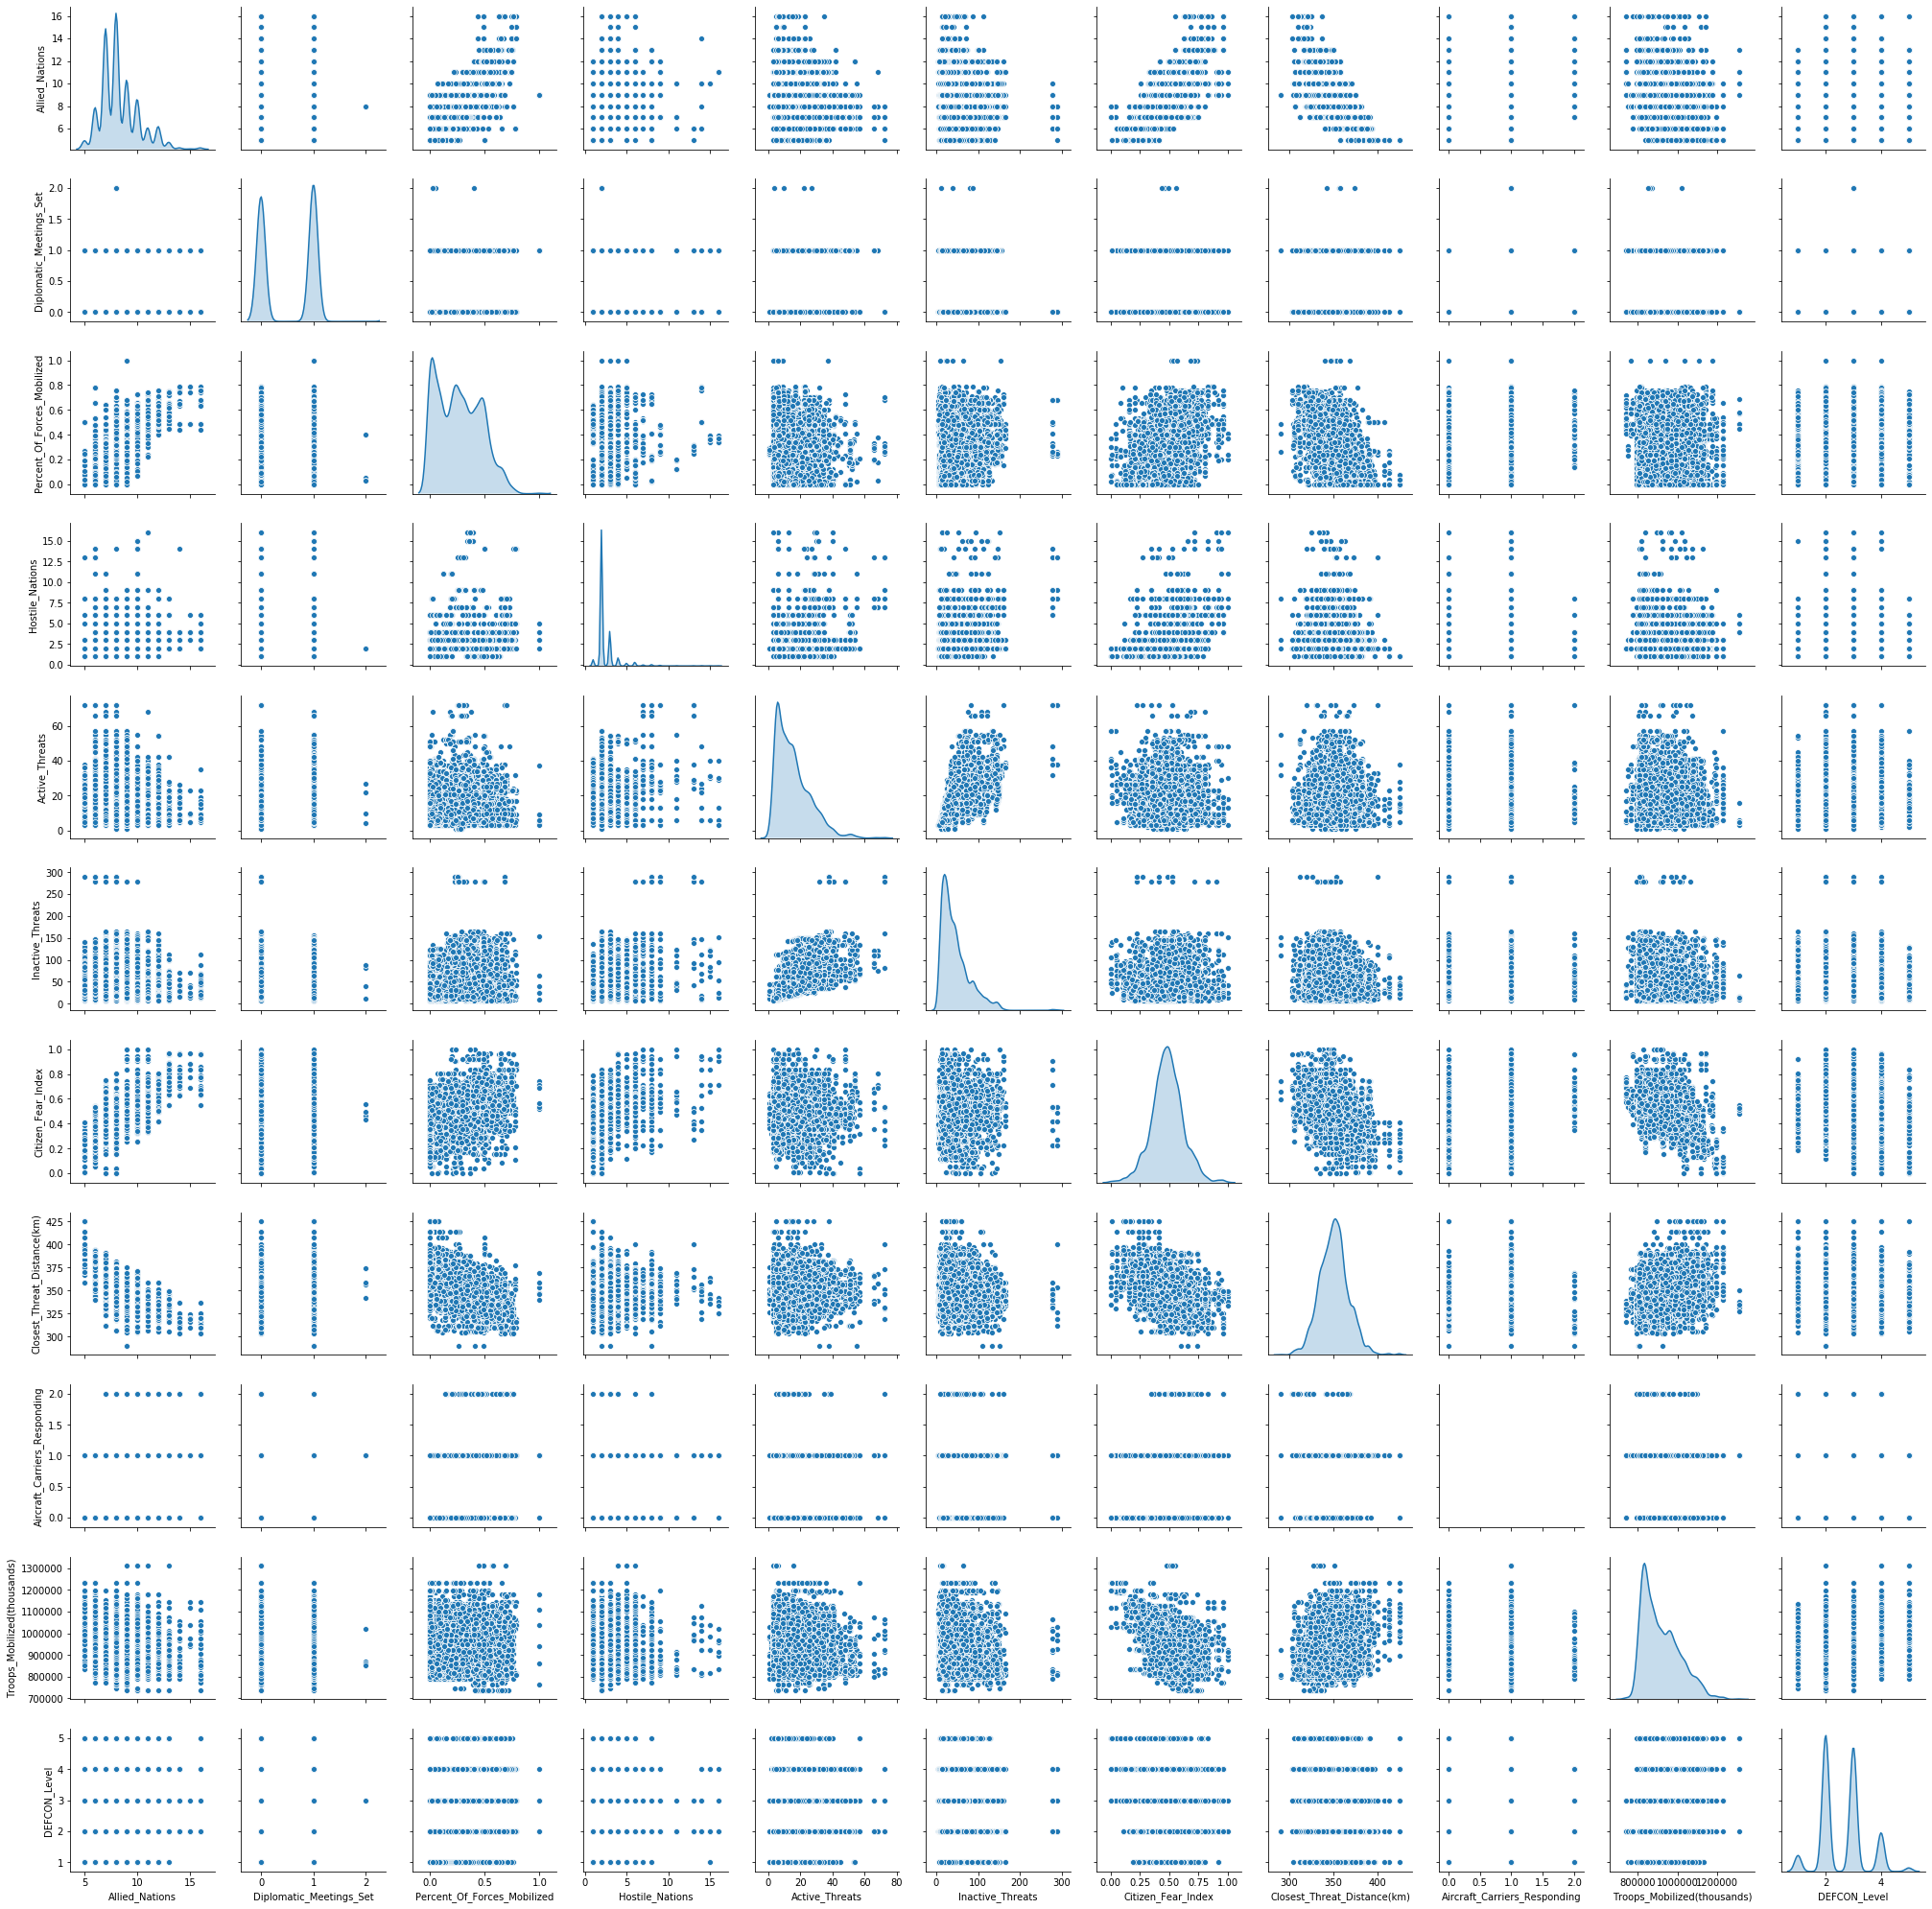

In [12]:
sns.pairplot(train[cols], diag_kind="kde")

Based on the above pair plot it can be seen that most features are highly uncorelated with the Y (DEFCON_Level) and thus requires data manipulation to improve the data quality.


### Data preprocessing

#### Add derived columns
Adding additional columns based on log and exponent of a few columns with values in large/small decimal values.
Also as the given data, from the above pairplot, does not show much patterns of correlation between X and Y, thus exploring if adding derived cols improve the model accuracy. this was also evaluated based on the model evaluation. 

In [13]:
train['Closest_Threat_log'] = np.log(train['Closest_Threat_Distance(km)'])
train['Troops_Mobilized_log'] = np.log(train['Troops_Mobilized(thousands)'])
train['Active_Threats_log'] = np.log(train['Active_Threats'])
train['Inactive_Threats_log'] = np.log(train['Inactive_Threats'])
train['Closest_Threat_sqrt'] = np.sqrt(train['Closest_Threat_Distance(km)'])
train['Troops_Mobilized_100000th'] = train['Troops_Mobilized(thousands)']/100000
train['Active_Threats_sqrt'] = np.sqrt(train['Active_Threats'])
train['Inactive_Threats_sqrt'] = np.sqrt(train['Inactive_Threats'])
train['Citizen_Fear_Index_exp'] = np.exp(train['Citizen_Fear_Index'])
# X_final = X.drop(['Closest_Threat_Distance(km)', 'Troops_Mobilized(thousands)','Active_Threats','Inactive_Threats','Citizen_Fear_Index'], axis=1)
# X_final = X.drop(['Closest_Threat_Distance(km)', 'Troops_Mobilized(thousands)'], axis=1)
train_final = train

#### Re-evaluation with added derived columns.

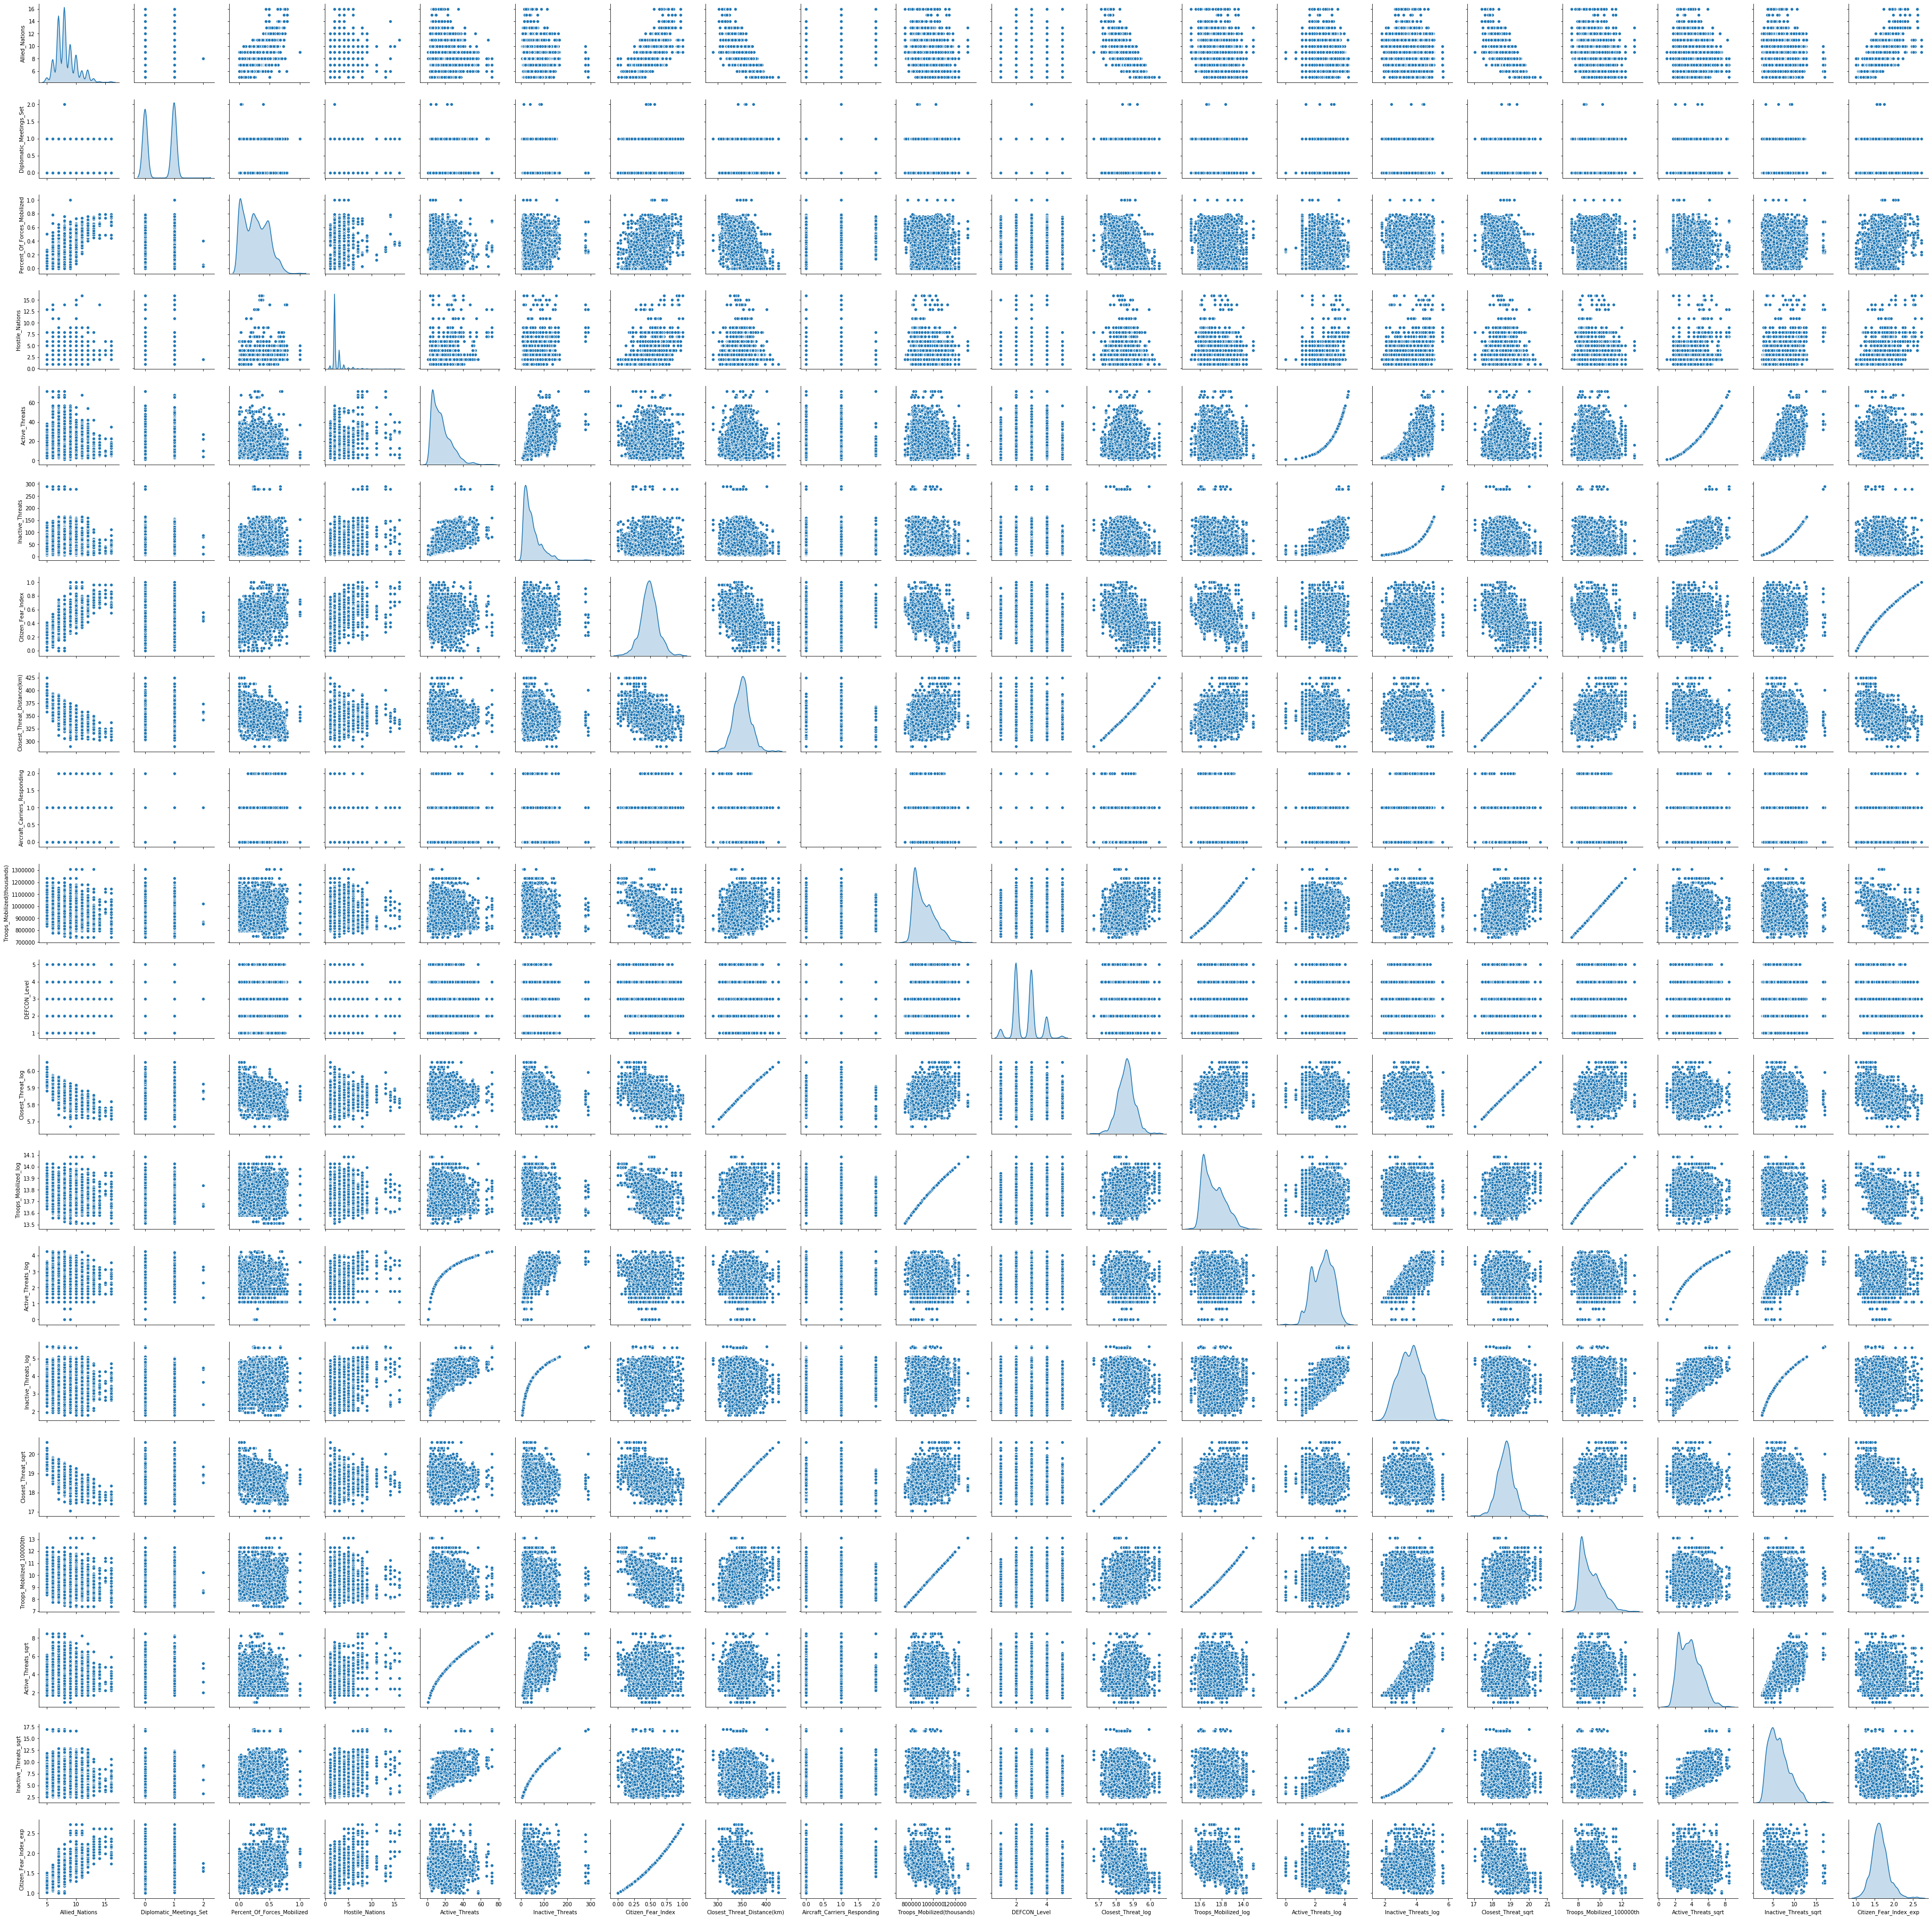

In [14]:
cols = list(train_final.columns)
sns.pairplot(train_final[cols], diag_kind="kde")

#### Splitting X and y 

In [15]:
Y = train_final['DEFCON_Level']
X_final = train_final.drop(['DEFCON_Level'], axis=1)

In [16]:
display(X_final)

Allied_Nations  Diplomatic_Meetings_Set  Percent_Of_Forces_Mobilized  \
0               16.0                      1.0                         0.67   
1                8.0                      1.0                         0.11   
2                9.0                      1.0                         0.49   
3                7.0                      0.0                         0.30   
4                8.0                      1.0                         0.12   
...              ...                      ...                          ...   
9995            11.0                      1.0                         0.49   
9996            10.0                      0.0                         0.52   
9997             7.0                      1.0                         0.13   
9998            10.0                      1.0                         0.42   
9999             8.0                      1.0                         0.24   

      Hostile_Nations  Active_Threats  Inactive_Threats  Citizen_Fear_Index  \
0                 3.0             6.0              25.0            0.787812   
1                 2.0            38.0              48.0            0.419236   
2                 3.0            32.0              69.0            0.582232   
3                 2.0            31.0              52.0            0.589574   
4                 5.0            13.0              42.0            0.552863   
...               ...             ...               ...                 ...   
9995              5.0             5.0              13.0            0.919971   
9996              2.0            14.0              28.0            0.433921   
9997              2.0            25.0              42.0            0.470631   
9998              2.0            21.0              84.0            0.662996   
9999              2.0            15.0             105.0            0.423642   

      Closest_Threat_Distance(km)  Aircraft_Carriers_Responding  \
0                      324.359985                           1.0   
1                      359.339996                           0.0   
2                      332.839996                           1.0   
3                      358.279999                           1.0   
4                      364.640015                           0.0   
...                           ...                           ...   
9995                   329.660004                           1.0   
9996                   348.739990                           1.0   
9997                   366.760010                           1.0   
9998                   348.739990                           1.0   
9999                   355.100006                           1.0   

      Troops_Mobilized(thousands)  Closest_Threat_log  Troops_Mobilized_log  \
0                        862400.0            5.781854             13.667475   
1                        959200.0            5.884269             13.773855   
2                        836000.0            5.807662             13.636384   
3                        924000.0            5.881315             13.736467   
4                        968000.0            5.898911             13.782988   
...                           ...                 ...                   ...   
9995                    1029600.0            5.798062             13.844681   
9996                    1047200.0            5.854327             13.861630   
9997                     941600.0            5.904708             13.755336   
9998                     836000.0            5.854327             13.636384   
9999                     862400.0            5.872399             13.667475   

      Active_Threats_log  Inactive_Threats_log  Closest_Threat_sqrt  \
0               1.791759              3.218876            18.009996   
1               3.637586              3.871201            18.956264   
2               3.465736              4.234107            18.243902   
3               3.433987              3.951244            18.928286   
4          

In [17]:
X_final.describe()

Allied_Nations  Diplomatic_Meetings_Set  Percent_Of_Forces_Mobilized  \
count    10000.000000             10000.000000                 10000.000000   
mean         8.317800                 0.524100                     0.270549   
std          1.748807                 0.500237                     0.196435   
min          5.000000                 0.000000                     0.000000   
25%          7.000000                 0.000000                     0.090000   
50%          8.000000                 1.000000                     0.260000   
75%          9.000000                 1.000000                     0.430000   
max         16.000000                 2.000000                     1.000000   

       Hostile_Nations  Active_Threats  Inactive_Threats  Citizen_Fear_Index  \
count     10000.000000    10000.000000      10000.000000        10000.000000   
mean          2.502300       15.754300         46.534599            0.486640   
std           1.311749       10.388883         34.012699            0.134552   
min           1.000000        1.000000          6.000000            0.000000   
25%           2.000000        7.000000         21.000000            0.406021   
50%           2.000000       13.000000         37.000000            0.486784   
75%           3.000000       21.000000         62.000000            0.567548   
max          16.000000       72.000000        289.000000            1.000000   

       Closest_Threat_Distance(km)  Aircraft_Carriers_Responding  \
count                 10000.000000                  10000.000000   
mean                    350.884979                      0.891300   
std                      16.285755                      0.329098   
min                     290.440002                      0.000000   
25%                     340.260010                      1.000000   
50%                     350.859985                      1.000000   
75%                     360.399994                      1.000000   
max                     425.059998                      2.000000   

       Troops_Mobilized(thousands)  Closest_Threat_log  Troops_Mobilized_log  \
count                 1.000000e+04        10000.000000          10000.000000   
mean                  9.174873e+05            5.859358             13.724314   
std                   9.271836e+04            0.046317              0.098015   
min                   7.392000e+05            5.671397             13.513324   
25%                   8.360000e+05            5.829710             13.636384   
50%                   8.976000e+05            5.860387             13.707479   
75%                   9.768000e+05            5.887215             13.792037   
max                   1.311200e+06            6.052230             14.086453   

       Active_Threats_log  Inactive_Threats_log  Closest_Threat_sqrt  \
count        10000.000000          10000.000000         10000.000000   
mean             2.538317              3.593100            18.726759   
std              0.683879              0.715027             0.434040   
min              0.000000              1.791759            17.042301   
25%              1.945910              3.044523            18.446138   
50%              2.564949              3.610918            18.731256   
75%              3.044523              4.127134            18.984203   
max              4.276666              5.666427            20.616983   

       Troops_Mobilized_100000th  Active_Threats_sqrt  Inactive_Threats_sqrt  \
count               10000.000000         10000.000000           10000.000000   
mean                    9.174874             3.765796               6.422237   
std                     0.927176             1.254113               2.299894   
min                     7.392000             1.000000               2.449490   
25%                     8.360000             2.645751               4.582576   
50%                     8.976000             3.605551               6.082763   
75%                     9.76800

#### Scaling and Normalizing the features.

In [18]:
train_features = ss().fit_transform(X_final)
train_features = norm().fit_transform(train_features)

Check scalled and normalized features.

In [19]:
display(train_features)

array([[ 0.62592841,  0.13555434,  0.28975335, ..., -0.14956027,
        -0.08811653,  0.35460723],
       [-0.03860795,  0.20211439, -0.17364111, ...,  0.40632689,
         0.04673516, -0.11477487],
       [ 0.09184936,  0.22399523,  0.26304423, ...,  0.35502439,
         0.19291196,  0.15608532],
       ...,
       [-0.26324325,  0.33233961, -0.24995235, ...,  0.34377694,
         0.00888024, -0.06351369],
       [ 0.25894671,  0.25609856,  0.20481382, ...,  0.17531123,
         0.32105004,  0.35959003],
       [-0.05490084,  0.28740842, -0.04698214, ...,  0.02580737,
         0.50240457, -0.15414575]])

As the classes in given data set are 1-5, and as to_categorical() returns classes starting 0, getting classes from 0-4 (in place of 1-5) and thus the final predictions will map to following,

| Actual class | Predicted class |
|:---:         | :---:           |
| 1 | 0 |
| 2 | 1 |
| 3 | 2 |
| 4 | 3 |
| 5 | 4 |

In [20]:
num_classes = len(np.unique(Y))
train_labels = to_categorical(Y-1, num_classes)
# train_labels = Y
# print(train_labels.unique().size)

Check the number of Features and labels to decide on Input and output layer nodes.

In [21]:
print(train_features.shape)
print(train_labels.shape)

(10000, 19)
(10000, 5)


In [22]:
input_nodes = train_features.shape[1]
output_nodes = train_labels.shape[1]
# output_nodes = train_labels.unique().size
print("input_nodes: {}\noutput_nodes: {}".format(input_nodes,output_nodes))

input_nodes: 19
output_nodes: 5


### Model building and training

#### Helper function for repeated jobs

In [23]:
# Function to create the ANN model 

def simple_nn(input_nodes, output_nodes, layers, power, multiplier):
    # power = 10
    init_nodes = 2**(power)

    # initialize model
    model = Sequential()

    print("Nodes in layer 0 : {}".format(init_nodes))
    model.add(Dense(init_nodes, input_dim=input_nodes, kernel_initializer='glorot_uniform'))
    model.add(BatchNormalization())
    model.add(ELU())    
    model.add(Dropout(0.2))
    i = 1
    while i < layers:
      # power = (power - 1)
      nodes = 2**(power-(i*multiplier))
      if nodes > output_nodes:
        print("Nodes in layer {} : {}".format(i , nodes))
        model.add(Dense(nodes, kernel_initializer='glorot_uniform'))
        model.add(BatchNormalization())
        model.add(ELU())    
        model.add(Dropout(0.2))
        i += 1
      else:
        break

    print("Nodes in output layer : {}".format(output_nodes))
    model.add(Dense(output_nodes, kernel_initializer='glorot_uniform', activation='softmax'))

    return model

In [24]:
# Function to plat model history

def plot_model_history(name,model_history):
    fig, axs = plt.subplots(1,3,figsize=(25,7))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['accuracy'])+1),model_history.history['accuracy'])
    axs[0].plot(range(1,len(model_history.history['val_accuracy'])+1),model_history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy : {}'.format(k))
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1),len(model_history.history['accuracy'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss : {}'.format(k))
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[2].plot(range(1,len(model_history.history['ce'])+1),model_history.history['ce'])
    axs[2].plot(range(1,len(model_history.history['val_ce'])+1),model_history.history['val_ce'])
    axs[2].set_title('Cross Entropy : {}'.format(k))
    axs[2].set_ylabel('Cross Entropy')
    axs[2].set_xlabel('Epoch')
    axs[2].set_xticks(np.arange(1,len(model_history.history['ce'])+1),len(model_history.history['ce'])/10)
    axs[2].legend(['train', 'val'], loc='best')
    plt.show()

In [25]:
# Function to evaluate the Model

def evalModel(name,k,v,epochs,batch,valsplit,callbacks,train_x, test_x, train_y, test_y, lossfunc, matrics, input_nodes, output_nodes, layers, powerof2, multiplier):
    k1 = k
    m1 = simple_nn(input_nodes, output_nodes, layers, powerof2,multiplier)
    dateTimeObj = datetime.now()
    timestampStr = dateTimeObj.strftime("%d-%b-%Y-%H-%M")
    img_file = '{}_{}_{}_{}.png'.format(k,str(batch),lossfunc,timestampStr)

    tf.keras.utils.plot_model(m1, to_file=img_file, show_shapes=True,rankdir='LR')
    m1.compile(optimizer=v, loss=lossfunc, metrics=matrics)

    history1 = m1.fit(train_x, train_y, validation_split=valsplit,
                    epochs=epochs, batch_size=batch,
                    verbose=0, callbacks=callbacks)
    
    plot_model_history(k.upper(),history1)

    y = np.argmax(test_y,axis=1)
    y_pred = np.argmax(m1.predict(test_x),axis=1)   

    print("Confusion metrics for test data : {} \n".format(k))           
    print(confusion_matrix(y,y_pred))

    acc = accuracy_score(y,y_pred)
    print("\nModel Accuracy for test data : {} \n".format(k))
    print(acc)
    m1.save('{}_{}_{}_{}_{}.tf'.format(k,acc,str(batch),lossfunc,timestampStr),save_format='tf')
    del m1
    return acc
    
    

In [26]:
# Function for Learning rate schedular callback

def lr_scheduler(epoch, lr):
    if epoch <= 1:
      return 0.1    
    if lr > 0.00001:
      return lr
    elif epoch < 150 :
      return 0.075
    elif epoch < 350:
      return 0.025
    else:
      return 0.005


def lr_reset(epoch, lr):
    if epoch <= 1:
      return 0.1    
    else:
      return lr

#### Configure Optimizers.

In [27]:
# Configure Optimizers.

# sgd = SGD(lr=0.1)
# rmsp = RMSprop(learning_rate=0.1, rho=0.9, momentum=0.2, epsilon=1e-08)
adam = Adam(learning_rate=0.1, beta_1=0.9, beta_2=0.99, epsilon=1e-08, amsgrad=False)
amsgrad = Adam(learning_rate=0.1, beta_1=0.9, beta_2=0.99, epsilon=1e-08, amsgrad=True)

# optis = {'sgd':sgd, 'rmsp':rmsp,'adam':adam, 'amsgrad':amsgrad}
optis = {'adam':adam, 'amsgrad':amsgrad}

In [28]:
optis.keys()

dict_keys(['adam', 'amsgrad'])

#### Define Callbacks for the Models.

In [29]:
#Callbacks for the Models.

reduce_lr = RLRP(monitor='val_loss', factor=0.05, patience=100, min_delta=0.01, min_lr=0.000005, cooldown=10)
schedule_lr = lrSch(lr_scheduler)
reset_lr = lrSch(lr_reset)
early_stop = ES(monitor='accuracy', mode='auto', patience=150, restore_best_weights=True)
EpochDots = tfmodeling.EpochDots()
ModelCP = MCP('best_model-{epoch:04d}-{loss:.4f}-{accuracy:.4f}.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)

#### Train and evaluate models for different Hyper Params.

In [30]:
train_x, test_x, train_y, test_y = tts(train_features, train_labels, test_size=0.05, random_state=42)




Evaluating modelADAM_1 
Nodes in layer 0 : 1024
Nodes in layer 1 : 512
Nodes in layer 2 : 256
Nodes in layer 3 : 128
Nodes in layer 4 : 64
Nodes in layer 5 : 32
Nodes in layer 6 : 16
Nodes in output layer : 5
Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.

Epoch: 0, accuracy:0.2922,  ce:1.6719,  loss:1.6719,  lr:0.1000,  val_accuracy:0.4047,  val_ce:862.8067,  val_loss:9.5393,  
....................................................................................................
Epoch: 100, accuracy:0.5649,  ce:0.9675,  loss:0.9675,  lr:0.1000,  val_accuracy:0.5732,  val_ce:0.9575,  val_loss:0.9575,  
....................................................................................................
Epoch: 200, accuracy:0.6270,  ce:0.8322,  loss:0.8322,  lr:0.0050,  val_accuracy:0.5726,  val_ce:1.0952,  val_loss:1.0952,  
....................................................................................................
Epoch: 300, accuracy:0.

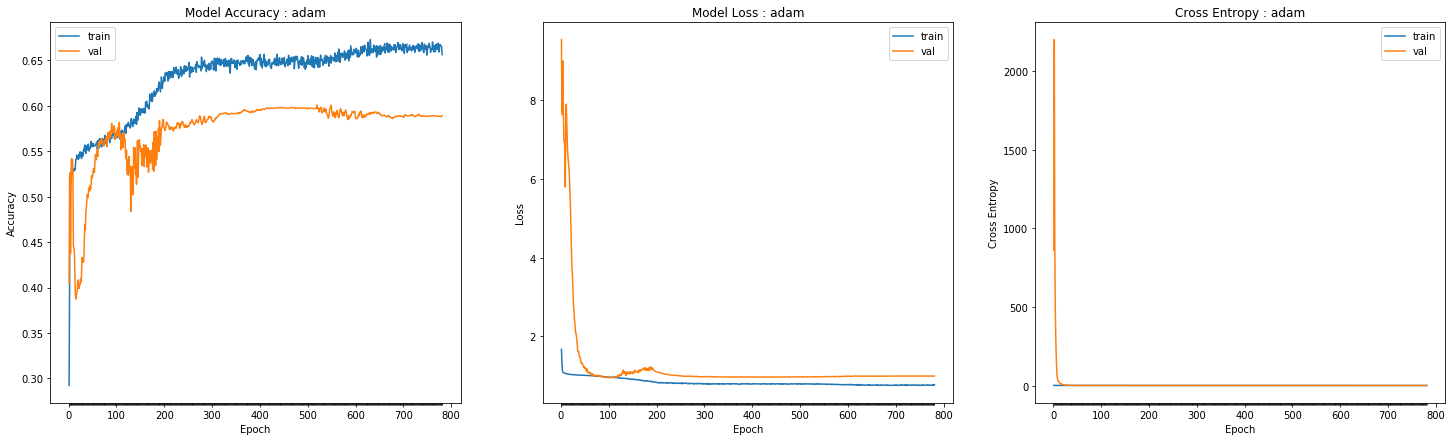

Confusion metrics for test data : adam 

[[  0  14   5   1   0]
 [  4 165  80   2   0]
 [  2  46 105  14   0]
 [  0   4  38  12   0]
 [  0   1   2   5   0]]

Model Accuracy for test data : adam 

0.564
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: adam_0.564_4000_kullback_leibler_divergence_14-Sep-2020-23-05.tf/assets
The start time is : 150.483857303 
The end time is : 444.7482072 
The time difference is : 294.264349897






Evaluating modelADAM_2 
Nodes in layer 0 : 1024
Nodes in layer 1 : 512
Nodes in layer 2 : 256
Nodes in layer 3 : 128
Nodes in layer 4 : 64
Nodes in layer 5 : 32
Nodes in output layer : 5
Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.

Epoch: 0, accuracy:0.2497,  ce:2.0952,  loss:2.0952,  lr:0.1000,  val_accuracy:0.3963,  val_ce:6393.8486,  val_loss:9.7278,  
...................................................................................................

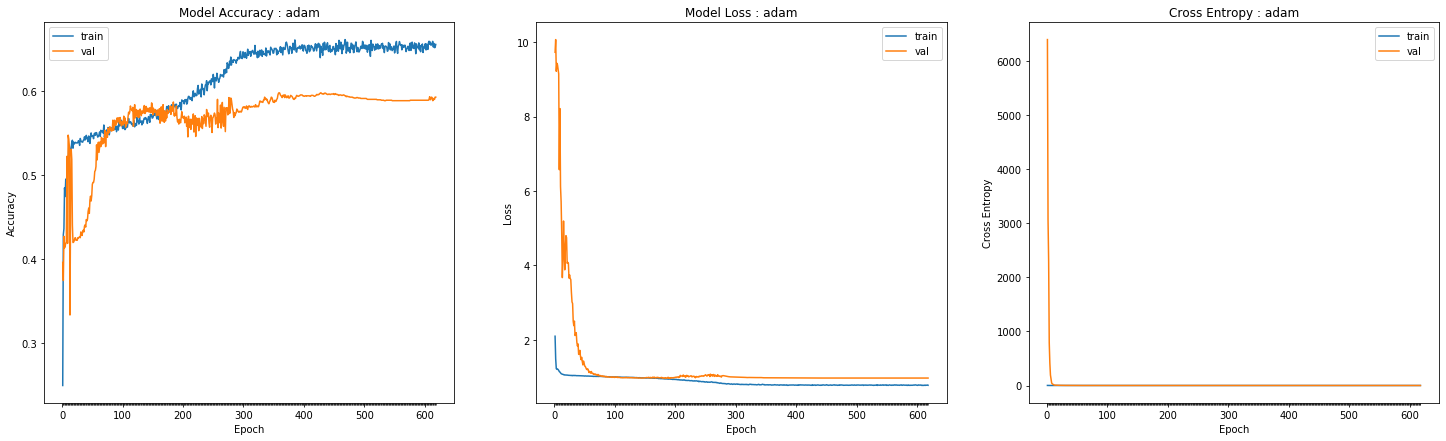

Confusion metrics for test data : adam 

[[  0  14   4   2   0]
 [  6 178  65   2   0]
 [  0  54 102  11   0]
 [  0   5  39  10   0]
 [  0   0   2   6   0]]

Model Accuracy for test data : adam 

0.58
INFO:tensorflow:Assets written to: adam_0.58_4000_kullback_leibler_divergence_14-Sep-2020-23-09.tf/assets
The start time is : 444.748404704 
The end time is : 668.794985744 
The time difference is : 224.04658103999998






Evaluating modelADAM_3 
Nodes in layer 0 : 1024
Nodes in layer 1 : 512
Nodes in layer 2 : 256
Nodes in layer 3 : 128
Nodes in layer 4 : 64
Nodes in output layer : 5
Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.

Epoch: 0, accuracy:0.2624,  ce:2.5271,  loss:2.5267,  lr:0.1000,  val_accuracy:0.3321,  val_ce:12051.9902,  val_loss:10.7626,  
....................................................................................................
Epoch: 100, accuracy:0.5511,  ce:1.0055,  loss:1.0054,  lr:0.1000,  val_accuracy:0.5674,  val_

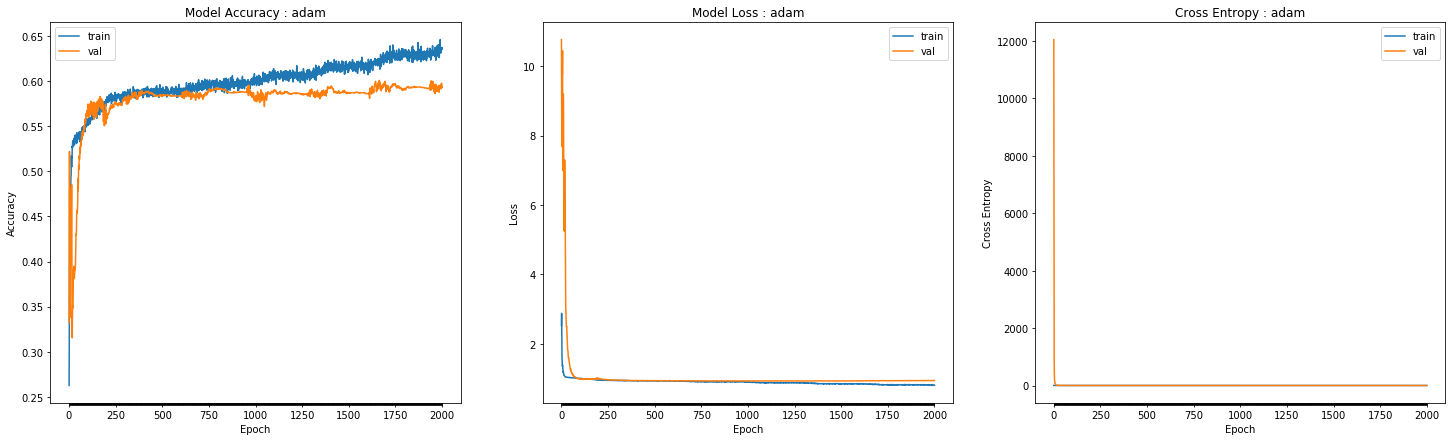

Confusion metrics for test data : adam 

[[  0  13   6   1   0]
 [  5 177  67   2   0]
 [  1  52 107   7   0]
 [  0   6  38  10   0]
 [  0   2   1   5   0]]

Model Accuracy for test data : adam 

0.588
INFO:tensorflow:Assets written to: adam_0.588_4000_kullback_leibler_divergence_14-Sep-2020-23-13.tf/assets
The start time is : 668.795160968 
The end time is : 1373.585548136 
The time difference is : 704.7903871679999






Evaluating modelADAM_4 
Nodes in layer 0 : 256
Nodes in layer 1 : 128
Nodes in layer 2 : 64
Nodes in layer 3 : 32
Nodes in layer 4 : 16
Nodes in output layer : 5
Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.

Epoch: 0, accuracy:0.2482,  ce:1.8456,  loss:1.8456,  lr:0.1000,  val_accuracy:0.4947,  val_ce:19.7851,  val_loss:6.4334,  
....................................................................................................
Epoch: 100, accuracy:0.5611,  ce:0.9827,  loss:0.9827,  lr:0.1000,  val_accuracy:0.5737,  val_ce:0.

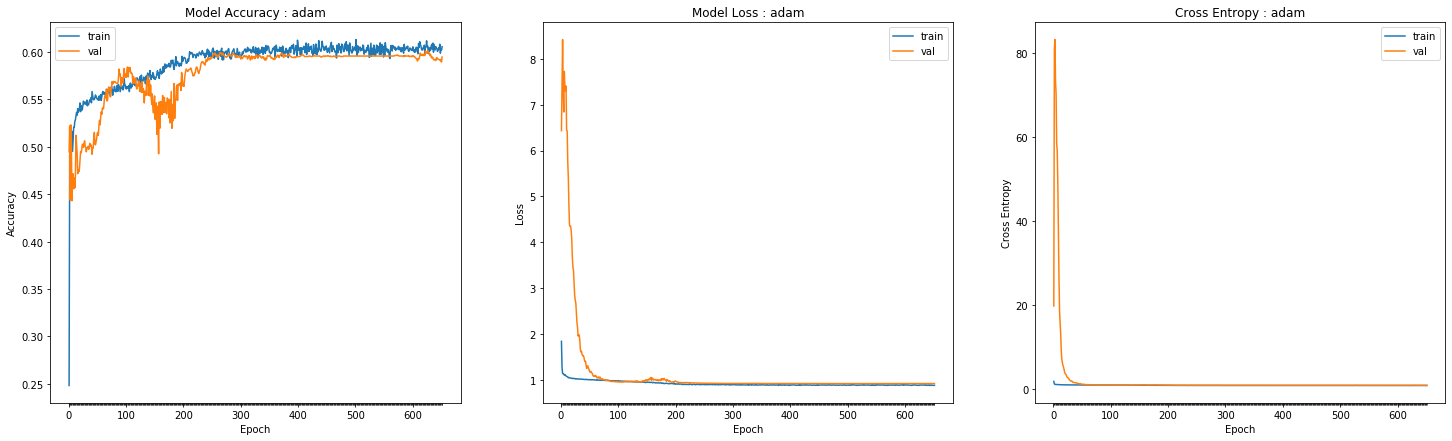

Confusion metrics for test data : adam 

[[  0  12   7   1   0]
 [  5 178  65   3   0]
 [  0  47 112   8   0]
 [  0   2  37  15   0]
 [  0   1   1   6   0]]

Model Accuracy for test data : adam 

0.61
INFO:tensorflow:Assets written to: adam_0.61_4000_kullback_leibler_divergence_14-Sep-2020-23-25.tf/assets
The start time is : 1373.5857013 
The end time is : 1431.497710238 
The time difference is : 57.9120089380001






Evaluating modelADAM_5 
Nodes in layer 0 : 2048
Nodes in layer 1 : 512
Nodes in layer 2 : 128
Nodes in layer 3 : 32
Nodes in output layer : 5
Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.

Epoch: 0, accuracy:0.2746,  ce:2.0350,  loss:2.0350,  lr:0.1000,  val_accuracy:0.2537,  val_ce:672.0726,  val_loss:11.9965,  
....................................................................................................
Epoch: 100, accuracy:0.5593,  ce:0.9880,  loss:0.9880,  lr:0.1000,  val_accuracy:0.5763,  val_ce:0.9669,  val_loss:0.9669

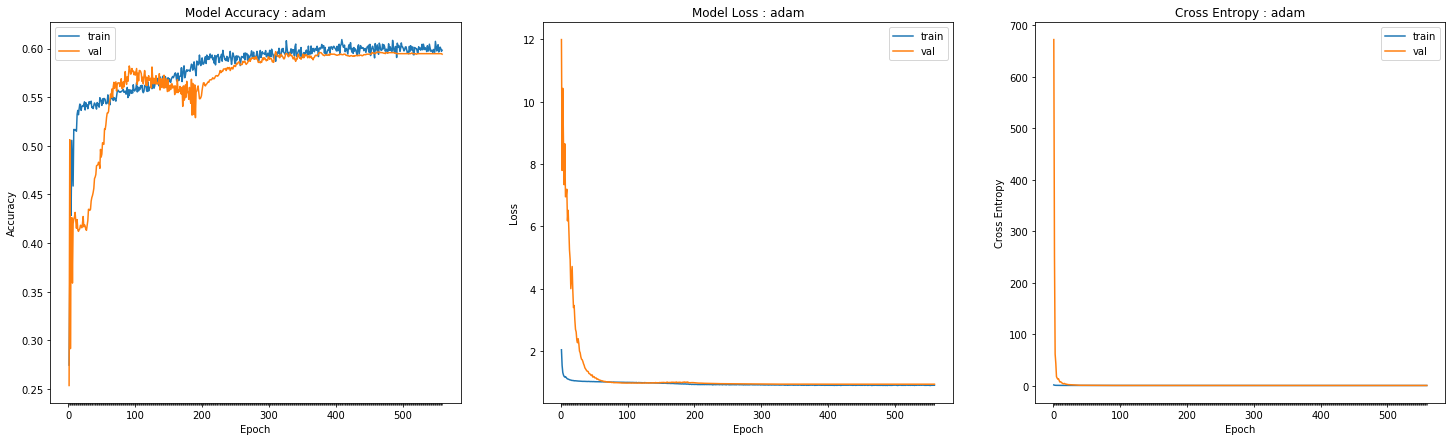

Confusion metrics for test data : adam 

[[  0  11   8   1   0]
 [  4 173  72   2   0]
 [  0  49 111   7   0]
 [  0   2  40  12   0]
 [  0   1   2   5   0]]

Model Accuracy for test data : adam 

0.592
INFO:tensorflow:Assets written to: adam_0.592_4000_kullback_leibler_divergence_14-Sep-2020-23-26.tf/assets
The start time is : 1431.49789623 
The end time is : 1716.202812166 
The time difference is : 284.70491593600013






Evaluating modelADAM_6 
Nodes in layer 0 : 1024
Nodes in layer 1 : 256
Nodes in layer 2 : 64
Nodes in layer 3 : 16
Nodes in output layer : 5
Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.

Epoch: 0, accuracy:0.2199,  ce:2.0158,  loss:2.0158,  lr:0.1000,  val_accuracy:0.3905,  val_ce:86.1330,  val_loss:9.7224,  
....................................................................................................
Epoch: 100, accuracy:0.5618,  ce:0.9850,  loss:0.9850,  lr:0.1000,  val_accuracy:0.5821,  val_ce:0.9644,  val_loss:0.96

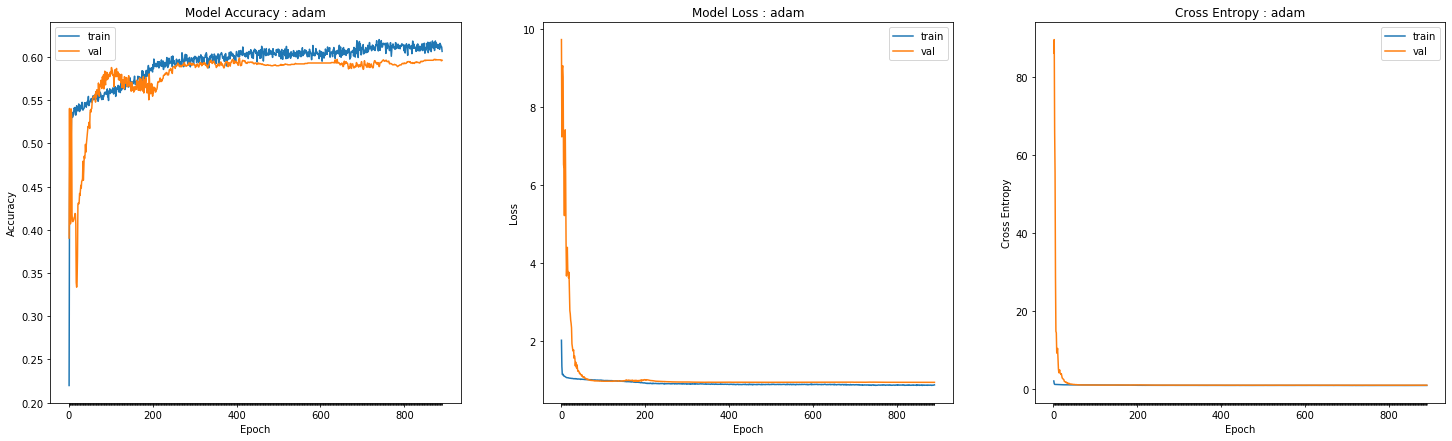

Confusion metrics for test data : adam 

[[  0  12   7   1   0]
 [  6 167  77   1   0]
 [  0  49 114   4   0]
 [  0   2  41  11   0]
 [  0   2   3   3   0]]

Model Accuracy for test data : adam 

0.584
INFO:tensorflow:Assets written to: adam_0.584_4000_kullback_leibler_divergence_14-Sep-2020-23-31.tf/assets
The start time is : 1716.203013533 
The end time is : 1914.514651448 
The time difference is : 198.3116379149999






Evaluating modelADAM_7 
Nodes in layer 0 : 1024
Nodes in layer 1 : 512
Nodes in layer 2 : 256
Nodes in layer 3 : 128
Nodes in layer 4 : 64
Nodes in layer 5 : 32
Nodes in layer 6 : 16
Nodes in output layer : 5
Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.

Epoch: 0, accuracy:0.2537,  ce:1.8967,  loss:1.1877,  lr:0.1000,  val_accuracy:0.5021,  val_ce:7634.0664,  val_loss:0.9958,  
....................................................................................................
Epoch: 100, accuracy:0.5599,  ce:3.1227,  loss:0.

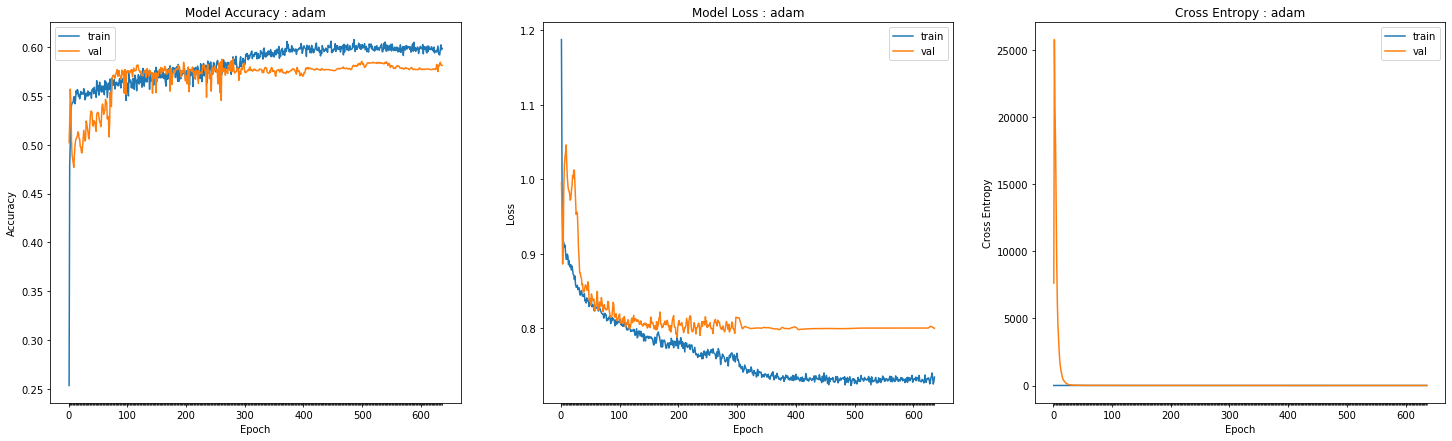

Confusion metrics for test data : adam 

[[  0  14   5   1   0]
 [  0 181  70   0   0]
 [  0  64  98   5   0]
 [  0   5  43   6   0]
 [  0   0   6   2   0]]

Model Accuracy for test data : adam 

0.57
INFO:tensorflow:Assets written to: adam_0.57_4000_categorical_hinge_14-Sep-2020-23-34.tf/assets
The start time is : 1914.514831601 
The end time is : 2155.181595581 
The time difference is : 240.6667639799998






Evaluating modelADAM_8 
Nodes in layer 0 : 1024
Nodes in layer 1 : 512
Nodes in layer 2 : 256
Nodes in layer 3 : 128
Nodes in layer 4 : 64
Nodes in layer 5 : 32
Nodes in output layer : 5
Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.

Epoch: 0, accuracy:0.2714,  ce:2.0904,  loss:1.1957,  lr:0.1000,  val_accuracy:0.5000,  val_ce:4195.5889,  val_loss:1.0001,  
....................................................................................................
Epoch: 100, accuracy:0.5655,  ce:22.0561,  loss:0.8689,  lr:0.1000,  val_accuracy:0

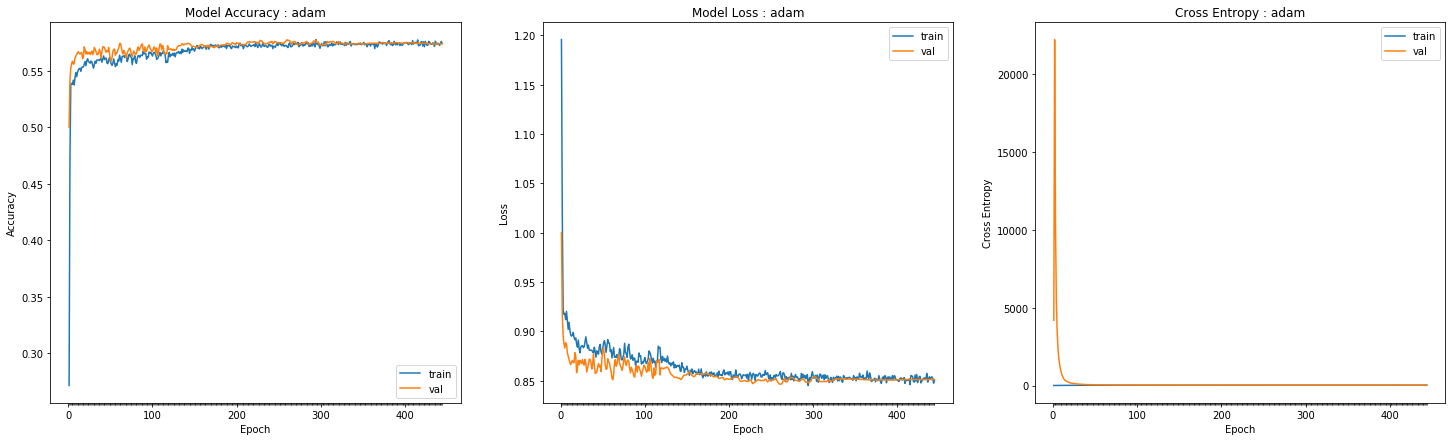

Confusion metrics for test data : adam 

[[  0  12   8   0   0]
 [  0 192  59   0   0]
 [  0  59 108   0   0]
 [  0   4  50   0   0]
 [  0   2   6   0   0]]

Model Accuracy for test data : adam 

0.6
INFO:tensorflow:Assets written to: adam_0.6_4000_categorical_hinge_14-Sep-2020-23-38.tf/assets
The start time is : 2155.181795629 
The end time is : 2323.687599585 
The time difference is : 168.5058039559999






Evaluating modelADAM_9 
Nodes in layer 0 : 1024
Nodes in layer 1 : 512
Nodes in layer 2 : 256
Nodes in layer 3 : 128
Nodes in layer 4 : 64
Nodes in output layer : 5
Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.

Epoch: 0, accuracy:0.2938,  ce:2.3965,  loss:1.1817,  lr:0.1000,  val_accuracy:0.5321,  val_ce:13088.7246,  val_loss:0.9358,  
....................................................................................................
Epoch: 100, accuracy:0.5499,  ce:76.5475,  loss:0.9000,  lr:0.1000,  val_accuracy:0.5595,  val_ce:134.2196

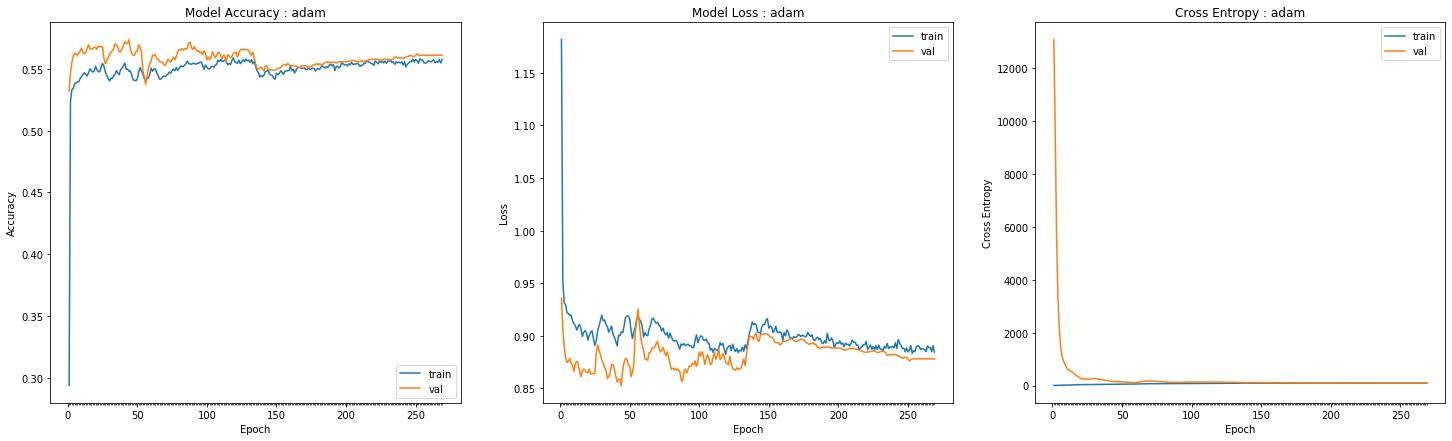

Confusion metrics for test data : adam 

[[  0  12   8   0   0]
 [  0 200  51   0   0]
 [  0  59 108   0   0]
 [  0  11  43   0   0]
 [  0   1   7   0   0]]

Model Accuracy for test data : adam 

0.616
INFO:tensorflow:Assets written to: adam_0.616_4000_categorical_hinge_14-Sep-2020-23-41.tf/assets
The start time is : 2323.68778815 
The end time is : 2426.052254546 
The time difference is : 102.3644663959999






Evaluating modelADAM_10 
Nodes in layer 0 : 256
Nodes in layer 1 : 128
Nodes in layer 2 : 64
Nodes in layer 3 : 32
Nodes in layer 4 : 16
Nodes in output layer : 5
Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.

Epoch: 0, accuracy:0.3222,  ce:1.7463,  loss:1.1037,  lr:0.1000,  val_accuracy:0.5516,  val_ce:112.1895,  val_loss:0.8977,  
....................................................................................................
Epoch: 100, accuracy:0.5667,  ce:8.5393,  loss:0.8644,  lr:0.1000,  val_accuracy:0.5737,  val_ce:15.8179,  

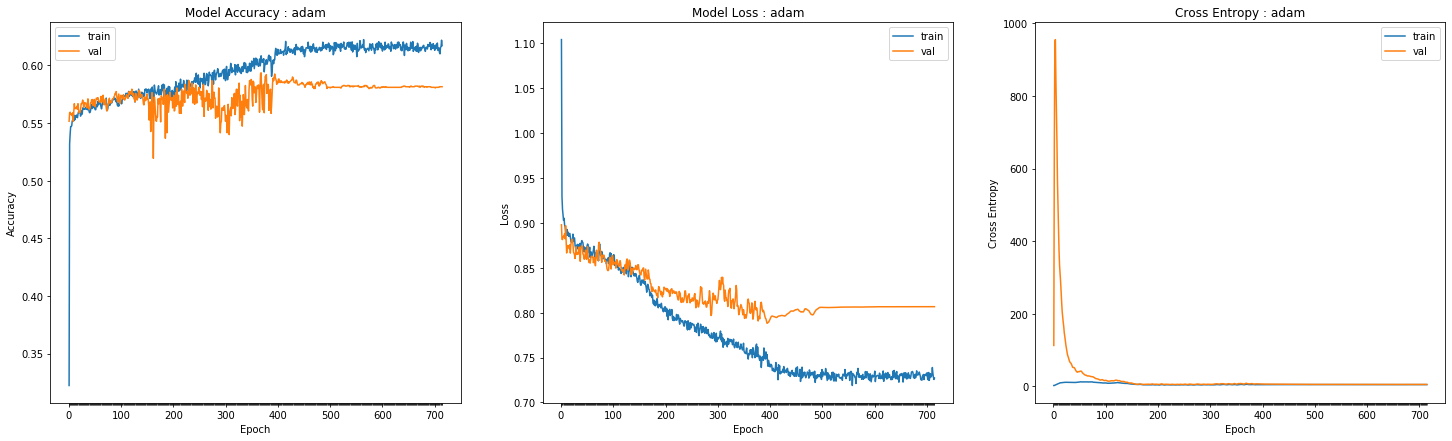

Confusion metrics for test data : adam 

[[  0  16   3   1   0]
 [  1 185  61   4   0]
 [  0  64  93  10   0]
 [  0   5  38  11   0]
 [  0   1   2   5   0]]

Model Accuracy for test data : adam 

0.578
INFO:tensorflow:Assets written to: adam_0.578_4000_categorical_hinge_14-Sep-2020-23-42.tf/assets
The start time is : 2426.052480964 
The end time is : 2493.560649289 
The time difference is : 67.50816832500004






Evaluating modelADAM_11 
Nodes in layer 0 : 2048
Nodes in layer 1 : 512
Nodes in layer 2 : 128
Nodes in layer 3 : 32
Nodes in output layer : 5
Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.

Epoch: 0, accuracy:0.3051,  ce:2.2213,  loss:1.1461,  lr:0.1000,  val_accuracy:0.5047,  val_ce:1621.8131,  val_loss:0.9903,  
....................................................................................................
Epoch: 100, accuracy:0.5568,  ce:40.3196,  loss:0.8860,  lr:0.1000,  val_accuracy:0.5689,  val_ce:72.8188,  val_loss:0.8629, 

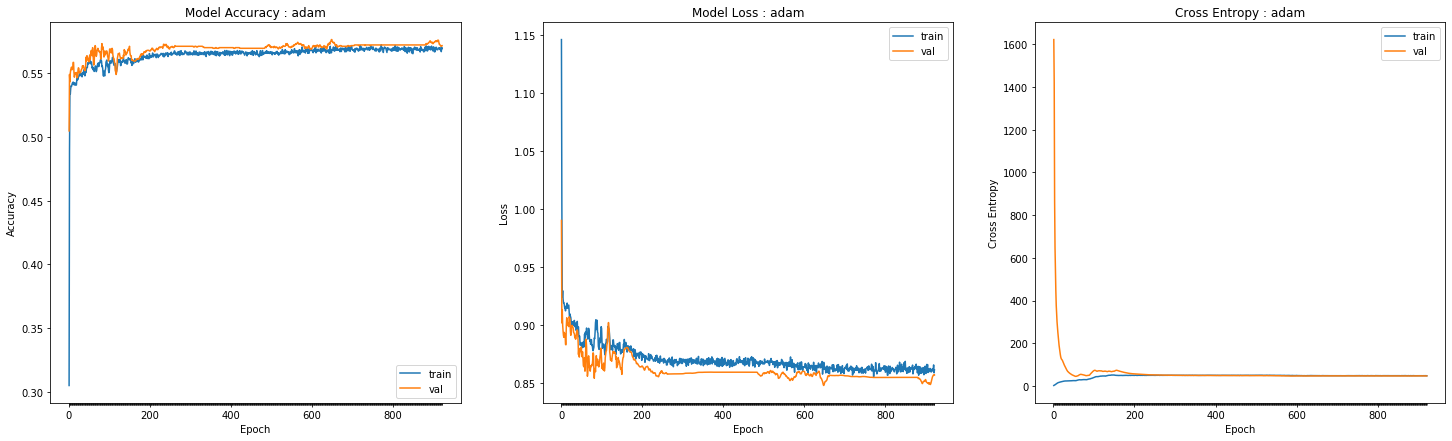

Confusion metrics for test data : adam 

[[  0  12   8   0   0]
 [  0 187  64   0   0]
 [  0  57 110   0   0]
 [  0   5  49   0   0]
 [  0   0   8   0   0]]

Model Accuracy for test data : adam 

0.594
INFO:tensorflow:Assets written to: adam_0.594_4000_categorical_hinge_14-Sep-2020-23-44.tf/assets
The start time is : 2493.560835354 
The end time is : 2987.948826855 
The time difference is : 494.38799150099976






Evaluating modelADAM_12 
Nodes in layer 0 : 1024
Nodes in layer 1 : 256
Nodes in layer 2 : 64
Nodes in layer 3 : 16
Nodes in output layer : 5
Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.

Epoch: 0, accuracy:0.3024,  ce:1.8865,  loss:1.1394,  lr:0.1000,  val_accuracy:0.3600,  val_ce:85.8377,  val_loss:1.2757,  
....................................................................................................
Epoch: 100, accuracy:0.5753,  ce:4.6471,  loss:0.8259,  lr:0.1000,  val_accuracy:0.5721,  val_ce:6.0020,  val_loss:0.8231,  
..

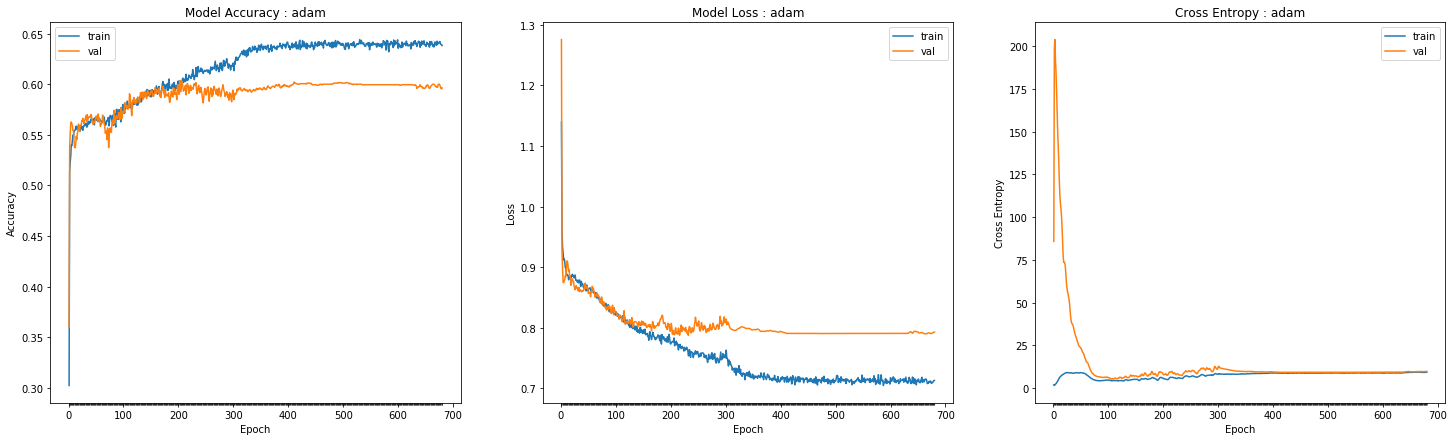

Confusion metrics for test data : adam 

[[  0  17   3   0   0]
 [  3 188  56   4   0]
 [  0  64  91  12   0]
 [  0   6  35  13   0]
 [  1   1   1   5   0]]

Model Accuracy for test data : adam 

0.584
INFO:tensorflow:Assets written to: adam_0.584_4000_categorical_hinge_14-Sep-2020-23-52.tf/assets
The start time is : 2987.949056067 
The end time is : 3144.887694505 
The time difference is : 156.938638438






Evaluating modelADAM_13 
Nodes in layer 0 : 1024
Nodes in layer 1 : 512
Nodes in layer 2 : 256
Nodes in layer 3 : 128
Nodes in layer 4 : 64
Nodes in layer 5 : 32
Nodes in layer 6 : 16
Nodes in output layer : 5
Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.

Epoch: 0, accuracy:0.2193,  ce:1.9459,  loss:1.9459,  lr:0.1000,  val_accuracy:0.4221,  val_ce:1296.6211,  val_loss:9.3121,  
....................................................................................................
Epoch: 100, accuracy:0.5718,  ce:0.9714,  loss:0.9714,  lr:0.1

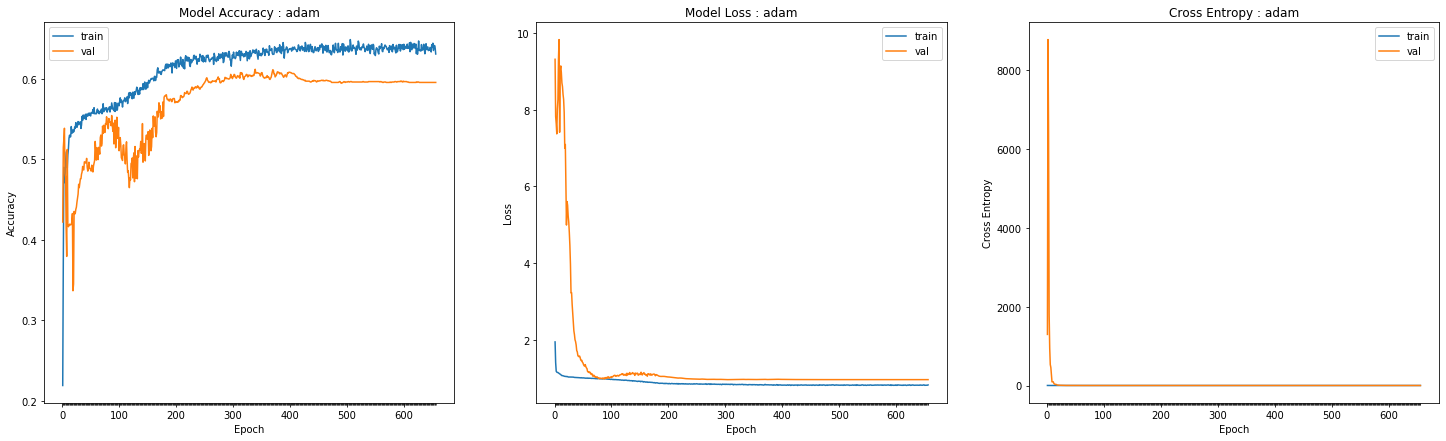

Confusion metrics for test data : adam 

[[  0  15   3   2   0]
 [  6 170  73   2   0]
 [  1  57  97  12   0]
 [  0   4  35  15   0]
 [  0   0   2   6   0]]

Model Accuracy for test data : adam 

0.564
INFO:tensorflow:Assets written to: adam_0.564_4000_kullback_leibler_divergence_14-Sep-2020-23-54.tf/assets
The start time is : 3144.887963144 
The end time is : 3391.568699455 
The time difference is : 246.68073631100015






Evaluating modelADAM_14 
Nodes in layer 0 : 1024
Nodes in layer 1 : 512
Nodes in layer 2 : 256
Nodes in layer 3 : 128
Nodes in layer 4 : 64
Nodes in layer 5 : 32
Nodes in output layer : 5
Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.

Epoch: 0, accuracy:0.2842,  ce:1.8090,  loss:1.8090,  lr:0.1000,  val_accuracy:0.2868,  val_ce:9660.0381,  val_loss:11.4947,  
....................................................................................................
Epoch: 100, accuracy:0.5617,  ce:0.9861,  loss:0.9861,  lr:0.1000,  

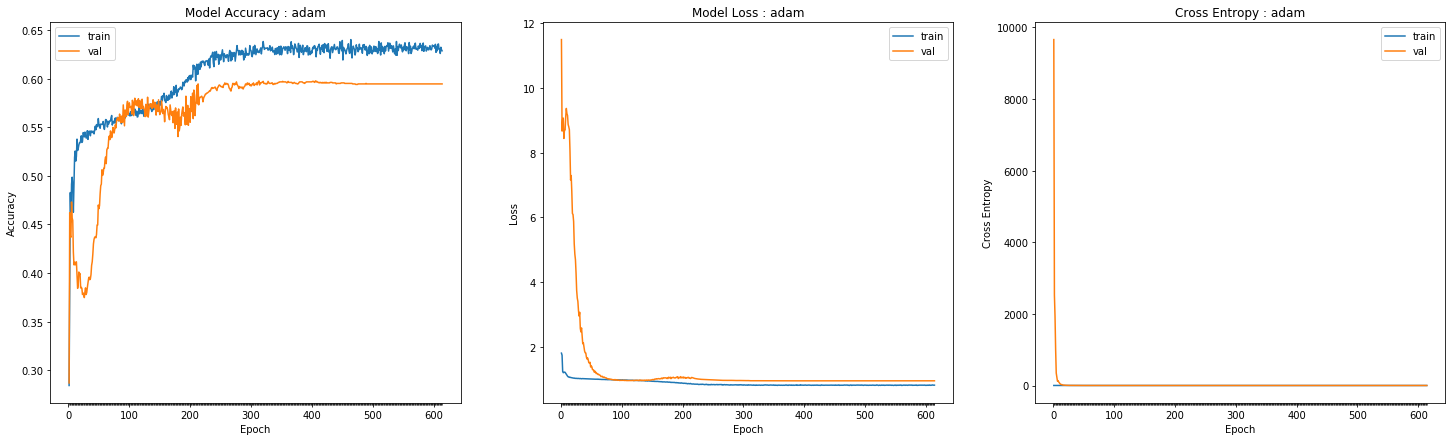

Confusion metrics for test data : adam 

[[  0  15   4   1   0]
 [  5 171  73   2   0]
 [  1  49 105  12   0]
 [  0   4  36  14   0]
 [  0   0   3   5   0]]

Model Accuracy for test data : adam 

0.58
INFO:tensorflow:Assets written to: adam_0.58_4000_kullback_leibler_divergence_14-Sep-2020-23-59.tf/assets
The start time is : 3391.568929271 
The end time is : 3614.11052949 
The time difference is : 222.54160021899997






Evaluating modelADAM_15 
Nodes in layer 0 : 1024
Nodes in layer 1 : 512
Nodes in layer 2 : 256
Nodes in layer 3 : 128
Nodes in layer 4 : 64
Nodes in output layer : 5
Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.

Epoch: 0, accuracy:0.2041,  ce:2.6686,  loss:2.6663,  lr:0.1000,  val_accuracy:0.4358,  val_ce:5756.1060,  val_loss:9.0822,  
....................................................................................................
Epoch: 100, accuracy:0.5658,  ce:0.9830,  loss:0.9830,  lr:0.1000,  val_accuracy:0.5663,  val_

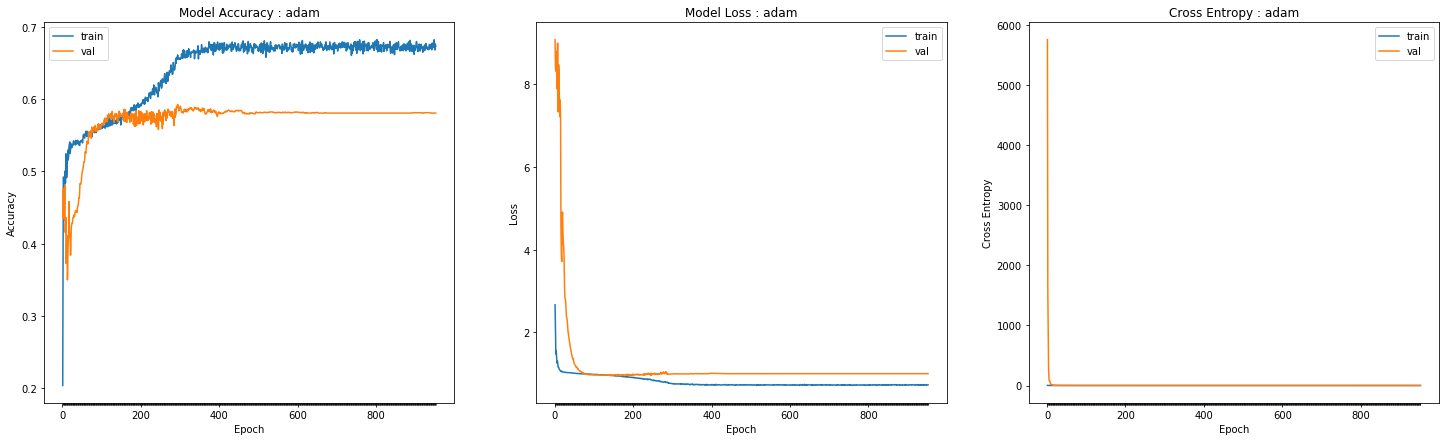

Confusion metrics for test data : adam 

[[  0  13   6   1   0]
 [ 10 175  63   3   0]
 [  2  48 103  14   0]
 [  0   4  32  18   0]
 [  0   1   2   5   0]]

Model Accuracy for test data : adam 

0.592
INFO:tensorflow:Assets written to: adam_0.592_4000_kullback_leibler_divergence_15-Sep-2020-00-02.tf/assets
The start time is : 3614.110718213 
The end time is : 3952.538774121 
The time difference is : 338.42805590800026






Evaluating modelADAM_16 
Nodes in layer 0 : 256
Nodes in layer 1 : 128
Nodes in layer 2 : 64
Nodes in layer 3 : 32
Nodes in layer 4 : 16
Nodes in output layer : 5
Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.

Epoch: 0, accuracy:0.2971,  ce:1.8262,  loss:1.8261,  lr:0.1000,  val_accuracy:0.3900,  val_ce:23.4643,  val_loss:8.7168,  
....................................................................................................
Epoch: 100, accuracy:0.5587,  ce:0.9904,  loss:0.9904,  lr:0.1000,  val_accuracy:0.5821,  val_ce

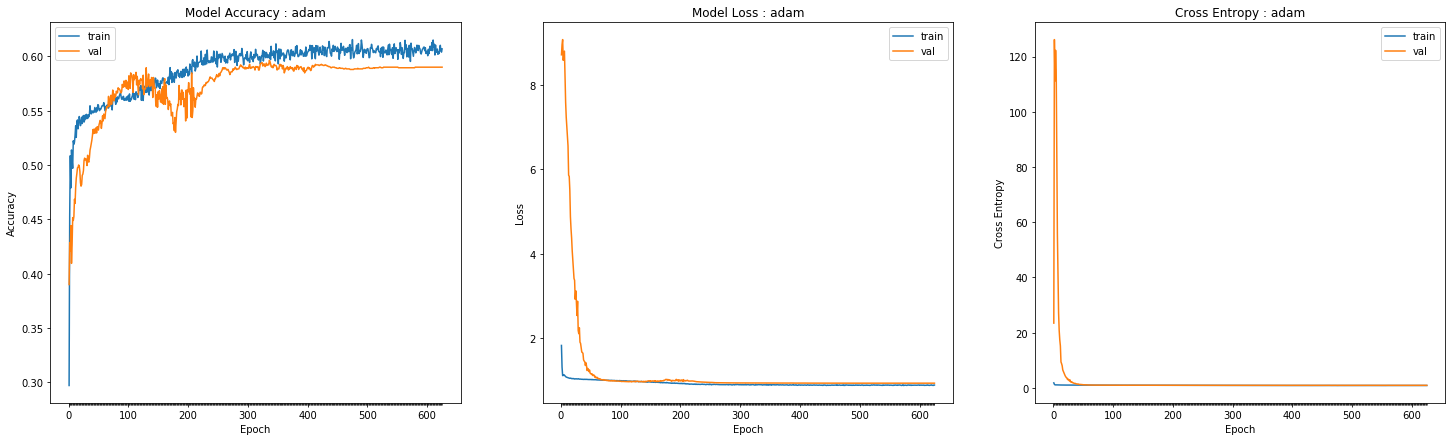

Confusion metrics for test data : adam 

[[  0  13   5   2   0]
 [  6 175  68   2   0]
 [  1  49 108   9   0]
 [  0   6  35  13   0]
 [  0   2   1   5   0]]

Model Accuracy for test data : adam 

0.592
INFO:tensorflow:Assets written to: adam_0.592_4000_kullback_leibler_divergence_15-Sep-2020-00-08.tf/assets
The start time is : 3952.538980674 
The end time is : 4008.194168967 
The time difference is : 55.655188293000265






Evaluating modelADAM_17 
Nodes in layer 0 : 2048
Nodes in layer 1 : 512
Nodes in layer 2 : 128
Nodes in layer 3 : 32
Nodes in output layer : 5
Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.

Epoch: 0, accuracy:0.2421,  ce:2.0605,  loss:2.0605,  lr:0.1000,  val_accuracy:0.5253,  val_ce:556.3456,  val_loss:7.6409,  
....................................................................................................
Epoch: 100, accuracy:0.5571,  ce:0.9841,  loss:0.9841,  lr:0.1000,  val_accuracy:0.5568,  val_ce:0.9815,  val_loss:

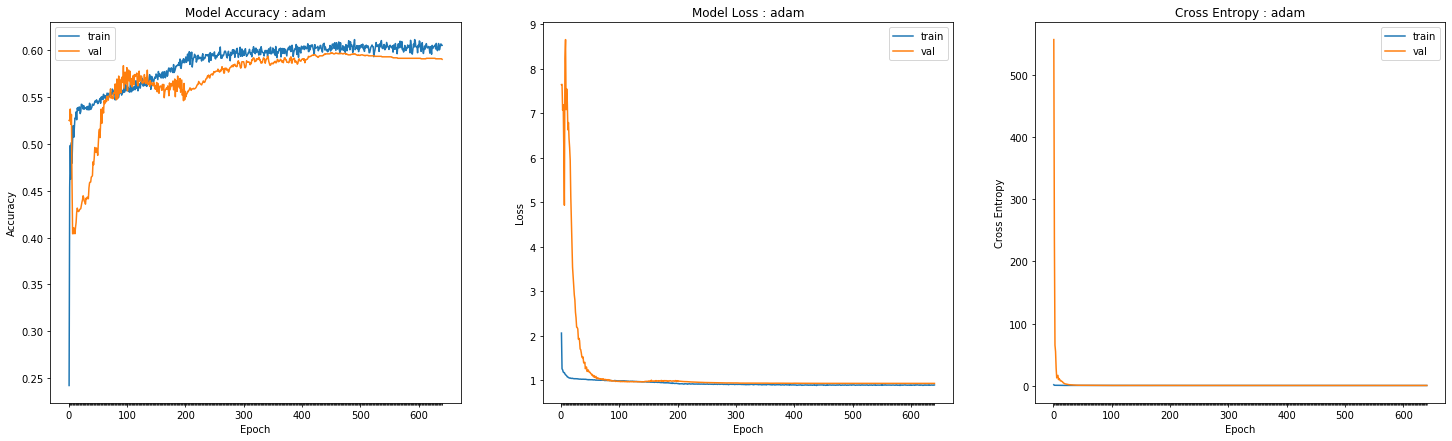

Confusion metrics for test data : adam 

[[  0  13   6   1   0]
 [  5 173  72   1   0]
 [  0  51 106  10   0]
 [  0   3  37  14   0]
 [  0   2   1   5   0]]

Model Accuracy for test data : adam 

0.586
INFO:tensorflow:Assets written to: adam_0.586_4000_kullback_leibler_divergence_15-Sep-2020-00-09.tf/assets
The start time is : 4008.194374815 
The end time is : 4327.355823063 
The time difference is : 319.1614482479995






Evaluating modelADAM_18 
Nodes in layer 0 : 1024
Nodes in layer 1 : 256
Nodes in layer 2 : 64
Nodes in layer 3 : 16
Nodes in output layer : 5
Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.

Epoch: 0, accuracy:0.2513,  ce:1.9308,  loss:1.9308,  lr:0.1000,  val_accuracy:0.4463,  val_ce:49.0046,  val_loss:8.4571,  
....................................................................................................
Epoch: 100, accuracy:0.5537,  ce:0.9926,  loss:0.9926,  lr:0.1000,  val_accuracy:0.5695,  val_ce:0.9771,  val_loss:0.9

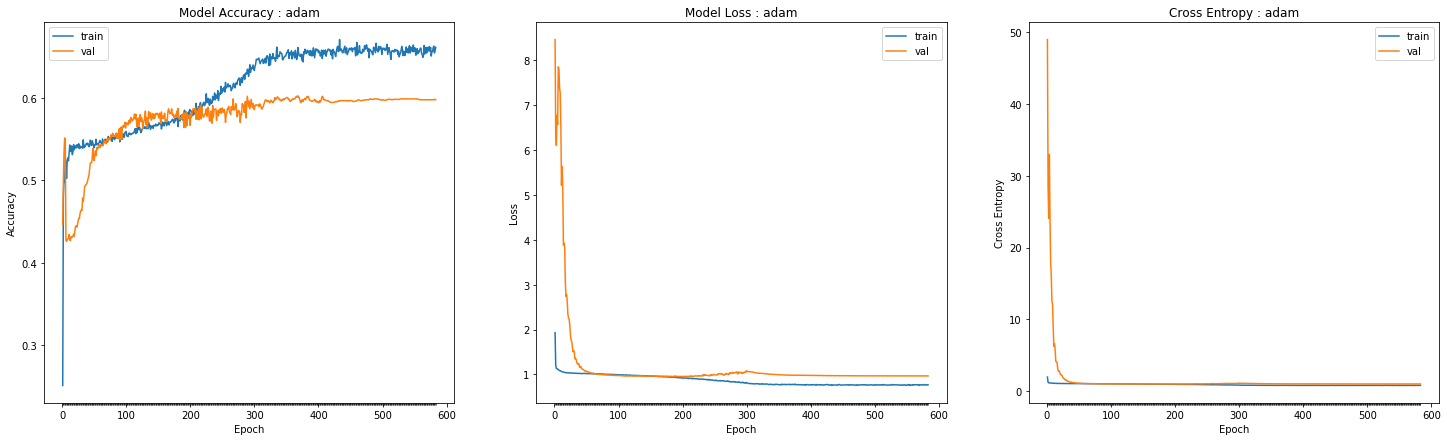

Confusion metrics for test data : adam 

[[  0  12   7   1   0]
 [  8 184  58   1   0]
 [  1  52 104  10   0]
 [  0   7  35  12   0]
 [  0   1   2   5   0]]

Model Accuracy for test data : adam 

0.6
INFO:tensorflow:Assets written to: adam_0.6_4000_kullback_leibler_divergence_15-Sep-2020-00-14.tf/assets
The start time is : 4327.355987757 
The end time is : 4453.619884583 
The time difference is : 126.26389682600075






Evaluating modelADAM_19 
Nodes in layer 0 : 1024
Nodes in layer 1 : 512
Nodes in layer 2 : 256
Nodes in layer 3 : 128
Nodes in layer 4 : 64
Nodes in layer 5 : 32
Nodes in layer 6 : 16
Nodes in output layer : 5
Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.

Epoch: 0, accuracy:0.3076,  ce:1.8617,  loss:1.1312,  lr:0.1000,  val_accuracy:0.4963,  val_ce:27154.6504,  val_loss:1.0074,  
....................................................................................................
Epoch: 100, accuracy:0.5579,  ce:3.0248,  loss:0.8

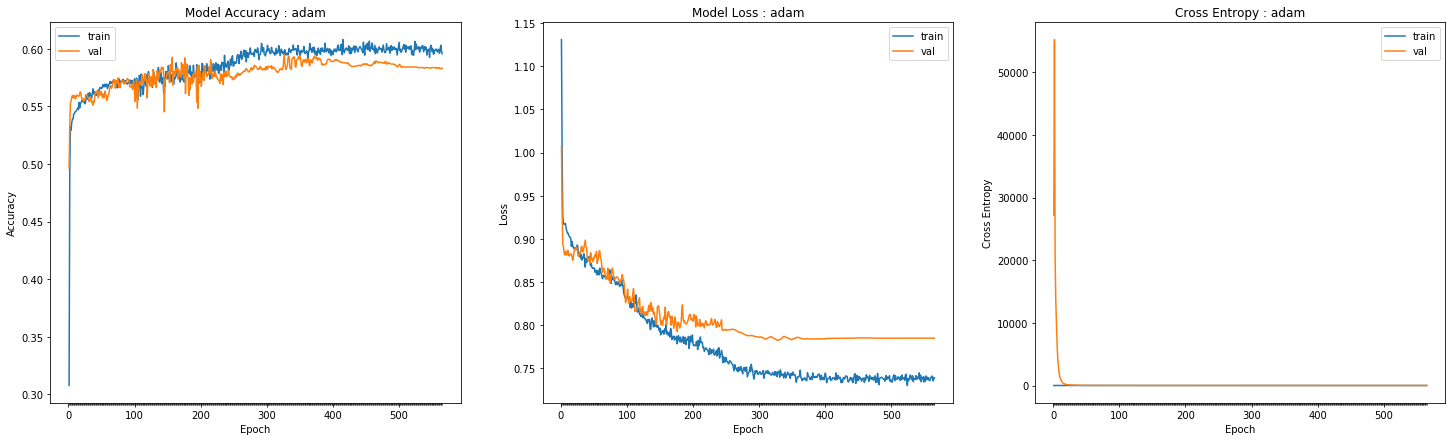

Confusion metrics for test data : adam 

[[  0  13   5   2   0]
 [  0 181  54  16   0]
 [  0  61  92  14   0]
 [  0   3  35  16   0]
 [  0   1   2   5   0]]

Model Accuracy for test data : adam 

0.578
INFO:tensorflow:Assets written to: adam_0.578_4000_categorical_hinge_15-Sep-2020-00-16.tf/assets
The start time is : 4453.620070967 
The end time is : 4655.881722461 
The time difference is : 202.26165149400003






Evaluating modelADAM_20 
Nodes in layer 0 : 1024
Nodes in layer 1 : 512
Nodes in layer 2 : 256
Nodes in layer 3 : 128
Nodes in layer 4 : 64
Nodes in layer 5 : 32
Nodes in output layer : 5
Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.

Epoch: 0, accuracy:0.2592,  ce:2.3287,  loss:1.2390,  lr:0.1000,  val_accuracy:0.5305,  val_ce:14822.4268,  val_loss:0.9389,  
....................................................................................................
Epoch: 100, accuracy:0.5621,  ce:20.7882,  loss:0.8747,  lr:0.1000,  val_accur

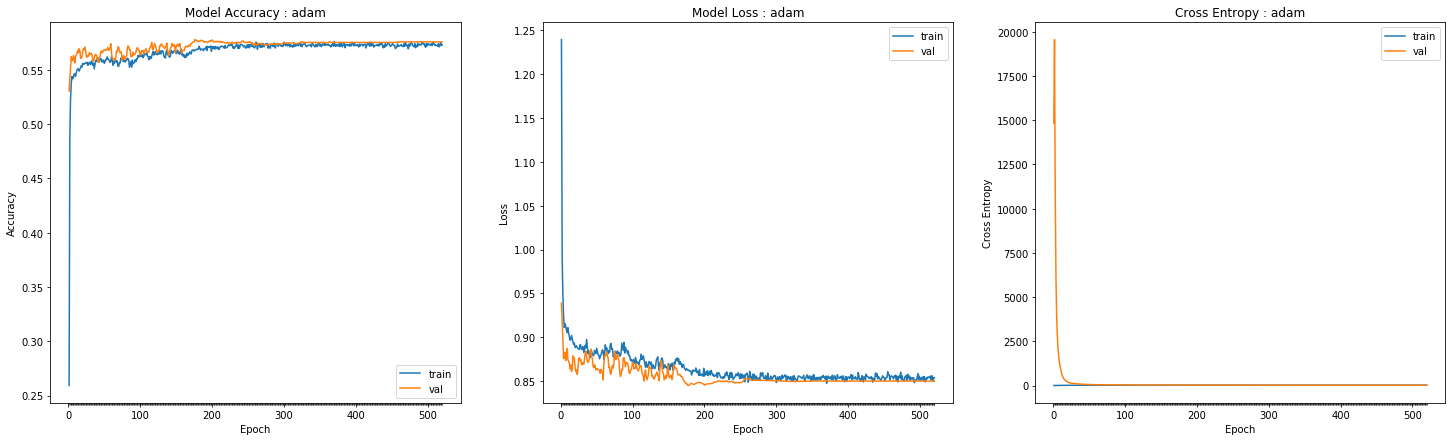

Confusion metrics for test data : adam 

[[  0  12   8   0   0]
 [  0 188  63   0   0]
 [  0  58 109   0   0]
 [  0   3  51   0   0]
 [  0   1   7   0   0]]

Model Accuracy for test data : adam 

0.594
INFO:tensorflow:Assets written to: adam_0.594_4000_categorical_hinge_15-Sep-2020-00-20.tf/assets
The start time is : 4655.881944695 
The end time is : 4839.713734094 
The time difference is : 183.83178939899972






Evaluating modelADAM_21 
Nodes in layer 0 : 1024
Nodes in layer 1 : 512
Nodes in layer 2 : 256
Nodes in layer 3 : 128
Nodes in layer 4 : 64
Nodes in output layer : 5
Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.

Epoch: 0, accuracy:0.3405,  ce:2.6306,  loss:1.1232,  lr:0.1000,  val_accuracy:0.4726,  val_ce:26466.5293,  val_loss:1.0547,  
....................................................................................................
Epoch: 100, accuracy:0.5574,  ce:68.1881,  loss:0.8852,  lr:0.1000,  val_accuracy:0.5684,  val_ce:10

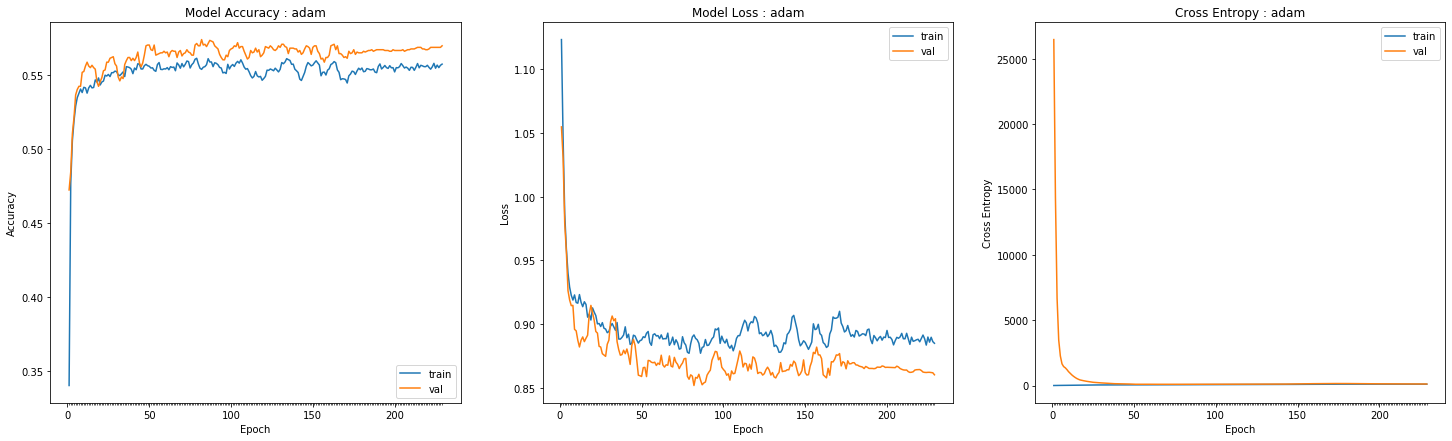

Confusion metrics for test data : adam 

[[  0  12   8   0   0]
 [  0 189  62   0   0]
 [  0  58 109   0   0]
 [  0   2  52   0   0]
 [  0   0   8   0   0]]

Model Accuracy for test data : adam 

0.596
INFO:tensorflow:Assets written to: adam_0.596_4000_categorical_hinge_15-Sep-2020-00-23.tf/assets
The start time is : 4839.713946824 
The end time is : 4923.210001781 
The time difference is : 83.49605495699961






Evaluating modelADAM_22 
Nodes in layer 0 : 256
Nodes in layer 1 : 128
Nodes in layer 2 : 64
Nodes in layer 3 : 32
Nodes in layer 4 : 16
Nodes in output layer : 5
Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.

Epoch: 0, accuracy:0.3074,  ce:1.8387,  loss:1.1238,  lr:0.1000,  val_accuracy:0.5116,  val_ce:65.4760,  val_loss:0.9770,  
....................................................................................................
Epoch: 100, accuracy:0.5509,  ce:3.0596,  loss:0.8081,  lr:0.1000,  val_accuracy:0.5684,  val_ce:5.6136,  v

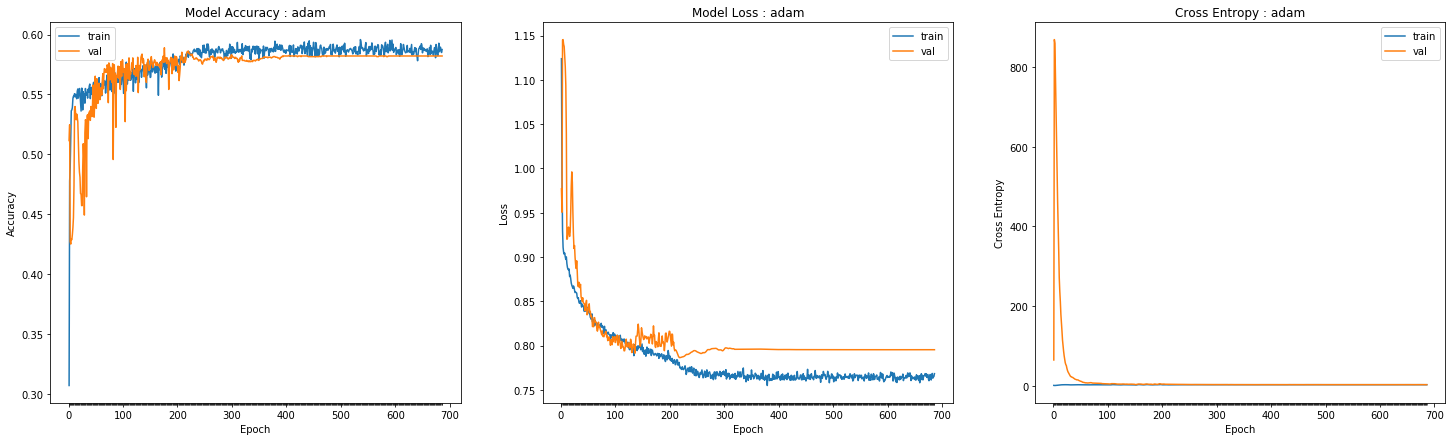

Confusion metrics for test data : adam 

[[  0  15   5   0   0]
 [  0 188  63   0   0]
 [  0  63 104   0   0]
 [  0   5  49   0   0]
 [  0   0   8   0   0]]

Model Accuracy for test data : adam 

0.584
INFO:tensorflow:Assets written to: adam_0.584_4000_categorical_hinge_15-Sep-2020-00-24.tf/assets
The start time is : 4923.21019722 
The end time is : 4985.884835649 
The time difference is : 62.67463842899997






Evaluating modelADAM_23 
Nodes in layer 0 : 2048
Nodes in layer 1 : 512
Nodes in layer 2 : 128
Nodes in layer 3 : 32
Nodes in output layer : 5
Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.

Epoch: 0, accuracy:0.3662,  ce:1.9802,  loss:1.0904,  lr:0.1000,  val_accuracy:0.5147,  val_ce:789.1141,  val_loss:0.9698,  
....................................................................................................
Epoch: 100, accuracy:0.5672,  ce:19.7512,  loss:0.8641,  lr:0.1000,  val_accuracy:0.5658,  val_ce:28.4402,  val_loss:0.8667,  


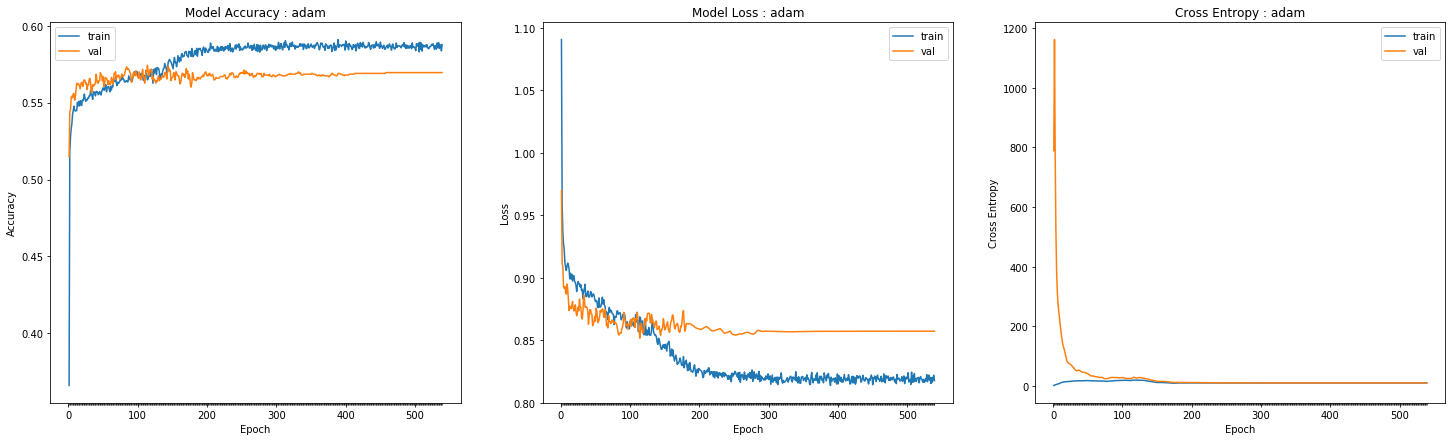

Confusion metrics for test data : adam 

[[  0  13   7   0   0]
 [  0 183  65   3   0]
 [  0  56 110   1   0]
 [  1   2  51   0   0]
 [  1   1   6   0   0]]

Model Accuracy for test data : adam 

0.586
INFO:tensorflow:Assets written to: adam_0.586_4000_categorical_hinge_15-Sep-2020-00-25.tf/assets
The start time is : 4985.885088216 
The end time is : 5256.344519658 
The time difference is : 270.4594314419992






Evaluating modelADAM_24 
Nodes in layer 0 : 1024
Nodes in layer 1 : 256
Nodes in layer 2 : 64
Nodes in layer 3 : 16
Nodes in output layer : 5
Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.

Epoch: 0, accuracy:0.3039,  ce:1.8503,  loss:1.1438,  lr:0.1000,  val_accuracy:0.4900,  val_ce:172.4218,  val_loss:1.0134,  
....................................................................................................
Epoch: 100, accuracy:0.5824,  ce:4.9156,  loss:0.8057,  lr:0.1000,  val_accuracy:0.5858,  val_ce:9.0099,  val_loss:0.8123,  
..

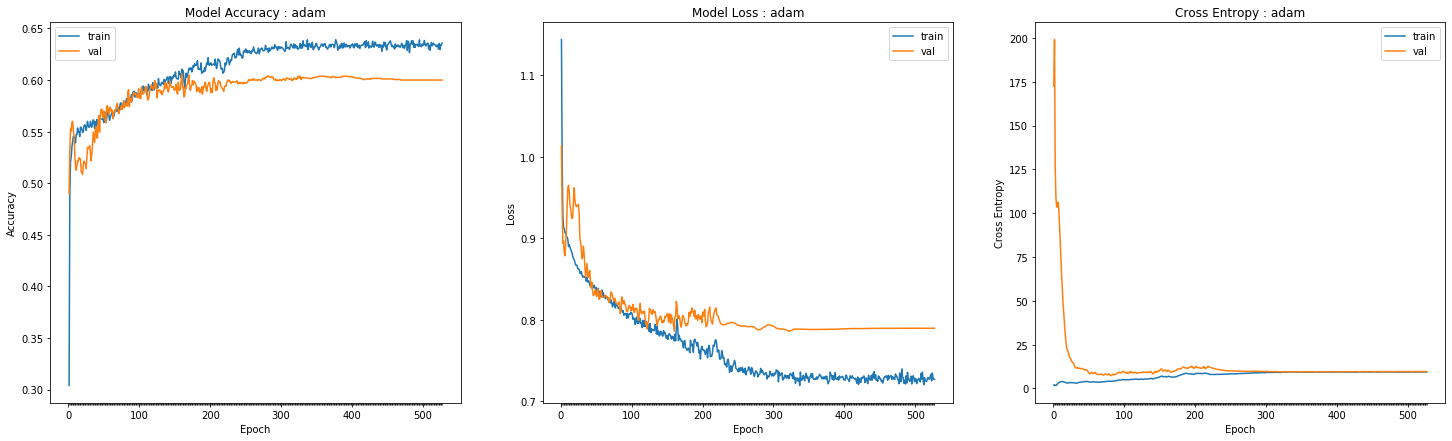

Confusion metrics for test data : adam 

[[  0  18   2   0   0]
 [  3 192  54   2   0]
 [  0  66  88  13   0]
 [  0   4  37  13   0]
 [  0   2   1   5   0]]

Model Accuracy for test data : adam 

0.586
INFO:tensorflow:Assets written to: adam_0.586_4000_categorical_hinge_15-Sep-2020-00-30.tf/assets
The start time is : 5256.34470421 
The end time is : 5370.033621676 
The time difference is : 113.68891746600002






Evaluating modelAMSGRAD_25 
Nodes in layer 0 : 1024
Nodes in layer 1 : 512
Nodes in layer 2 : 256
Nodes in layer 3 : 128
Nodes in layer 4 : 64
Nodes in layer 5 : 32
Nodes in layer 6 : 16
Nodes in output layer : 5
Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.

Epoch: 0, accuracy:0.2458,  ce:1.8666,  loss:1.8666,  lr:0.1000,  val_accuracy:0.3889,  val_ce:400.2643,  val_loss:9.7389,  
....................................................................................................
Epoch: 100, accuracy:0.5679,  ce:0.9816,  loss:0.9816,  

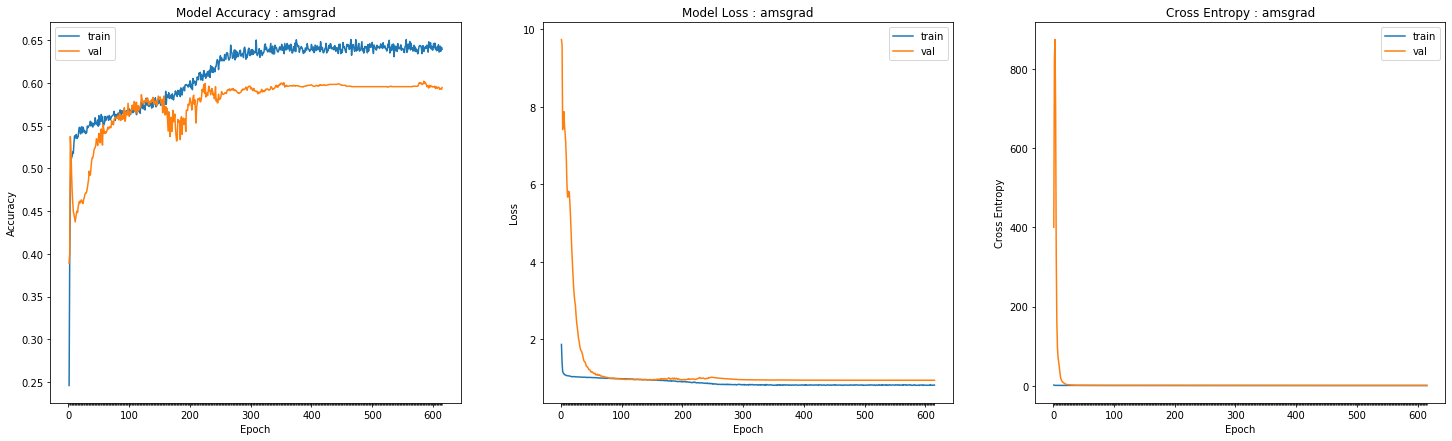

Confusion metrics for test data : amsgrad 

[[  0  12   7   1   0]
 [  8 165  77   1   0]
 [  1  47 104  15   0]
 [  0   4  35  15   0]
 [  0   1   2   5   0]]

Model Accuracy for test data : amsgrad 

0.568
INFO:tensorflow:Assets written to: amsgrad_0.568_4000_kullback_leibler_divergence_15-Sep-2020-00-32.tf/assets
The start time is : 5370.033821217 
The end time is : 5591.767948984 
The time difference is : 221.73412776700025






Evaluating modelAMSGRAD_26 
Nodes in layer 0 : 1024
Nodes in layer 1 : 512
Nodes in layer 2 : 256
Nodes in layer 3 : 128
Nodes in layer 4 : 64
Nodes in layer 5 : 32
Nodes in output layer : 5
Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.

Epoch: 0, accuracy:0.2567,  ce:1.9655,  loss:1.9655,  lr:0.1000,  val_accuracy:0.4768,  val_ce:1984.2003,  val_loss:8.4145,  
....................................................................................................
Epoch: 100, accuracy:0.5501,  ce:1.0071,  loss:1.0071,  l

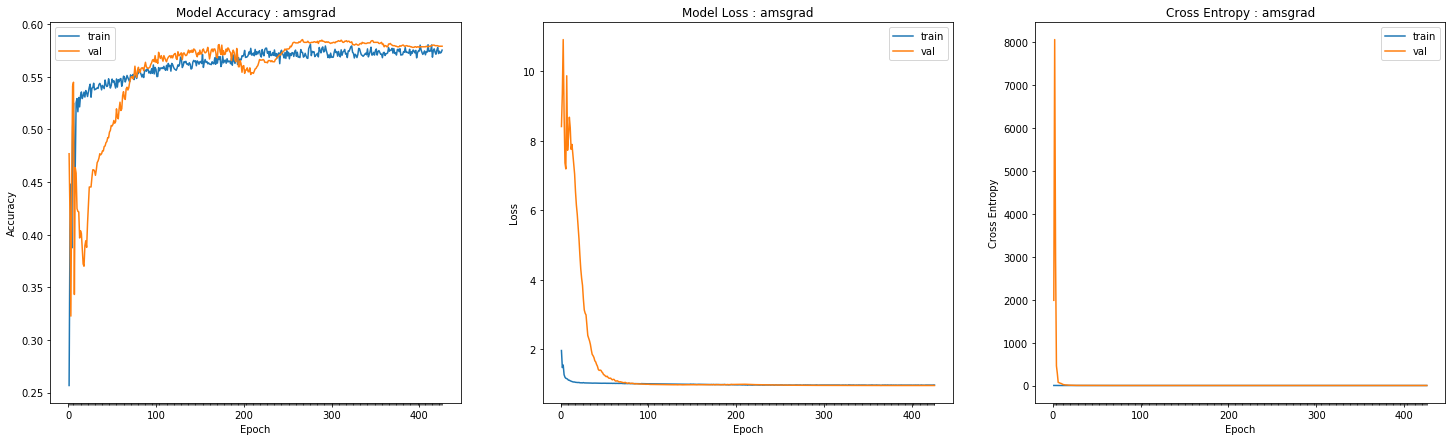

Confusion metrics for test data : amsgrad 

[[  0  12   7   1   0]
 [  0 165  86   0   0]
 [  0  44 118   5   0]
 [  0   4  41   9   0]
 [  0   0   5   3   0]]

Model Accuracy for test data : amsgrad 

0.584
INFO:tensorflow:Assets written to: amsgrad_0.584_4000_kullback_leibler_divergence_15-Sep-2020-00-35.tf/assets
The start time is : 5591.768167657 
The end time is : 5747.936160604 
The time difference is : 156.16799294700013






Evaluating modelAMSGRAD_27 
Nodes in layer 0 : 1024
Nodes in layer 1 : 512
Nodes in layer 2 : 256
Nodes in layer 3 : 128
Nodes in layer 4 : 64
Nodes in output layer : 5
Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.

Epoch: 0, accuracy:0.2650,  ce:2.2887,  loss:2.2885,  lr:0.1000,  val_accuracy:0.3816,  val_ce:9807.8232,  val_loss:9.9525,  
....................................................................................................
Epoch: 100, accuracy:0.5429,  ce:1.0170,  loss:1.0170,  lr:0.1000,  val_accurac

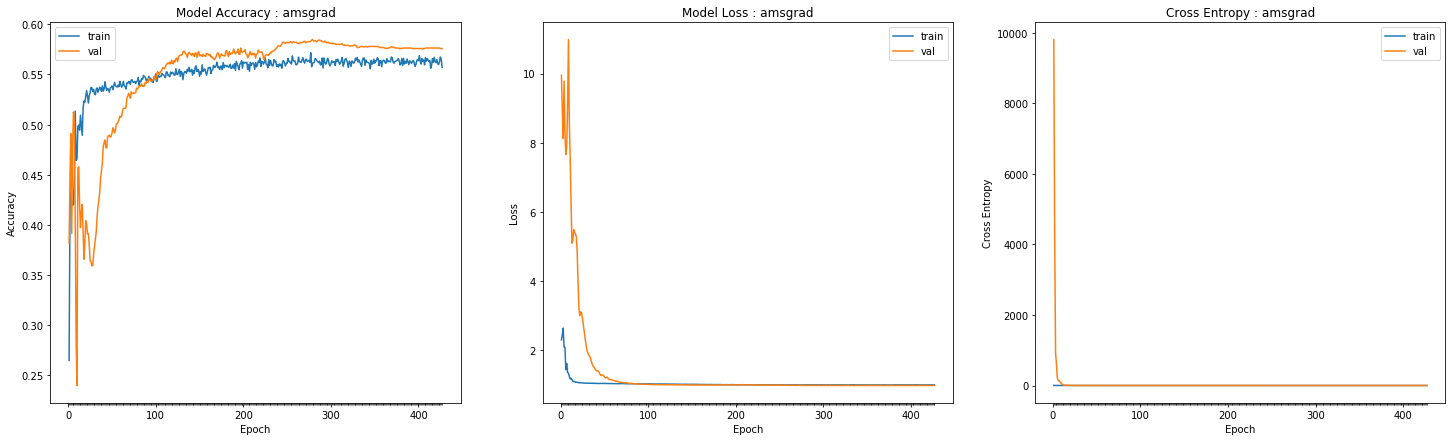

Confusion metrics for test data : amsgrad 

[[  0  12   7   1   0]
 [  0 169  81   1   0]
 [  0  48 112   7   0]
 [  0   4  39  11   0]
 [  0   0   5   3   0]]

Model Accuracy for test data : amsgrad 

0.584
INFO:tensorflow:Assets written to: amsgrad_0.584_4000_kullback_leibler_divergence_15-Sep-2020-00-38.tf/assets
The start time is : 5747.936327895 
The end time is : 5899.041962287 
The time difference is : 151.10563439199996






Evaluating modelAMSGRAD_28 
Nodes in layer 0 : 256
Nodes in layer 1 : 128
Nodes in layer 2 : 64
Nodes in layer 3 : 32
Nodes in layer 4 : 16
Nodes in output layer : 5
Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.

Epoch: 0, accuracy:0.2405,  ce:1.7897,  loss:1.7897,  lr:0.1000,  val_accuracy:0.4379,  val_ce:15.7753,  val_loss:6.3294,  
....................................................................................................
Epoch: 100, accuracy:0.5642,  ce:0.9860,  loss:0.9860,  lr:0.1000,  val_accuracy:0.5

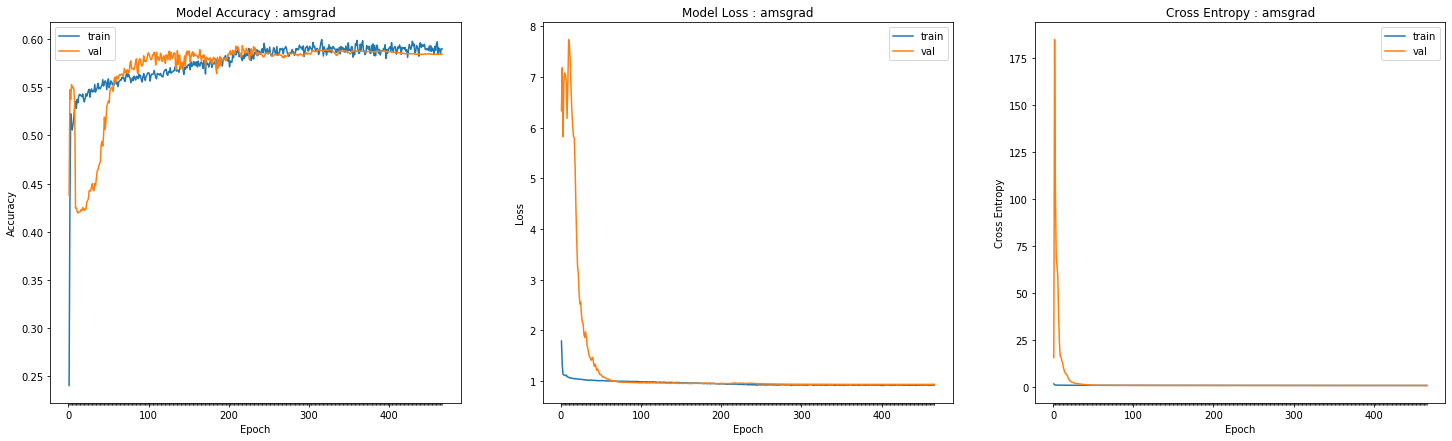

Confusion metrics for test data : amsgrad 

[[  0  14   5   1   0]
 [  5 178  65   3   0]
 [  1  49 112   5   0]
 [  0   5  37  12   0]
 [  0   0   4   4   0]]

Model Accuracy for test data : amsgrad 

0.604
INFO:tensorflow:Assets written to: amsgrad_0.604_4000_kullback_leibler_divergence_15-Sep-2020-00-40.tf/assets
The start time is : 5899.042165106 
The end time is : 5943.72661723 
The time difference is : 44.68445212400002






Evaluating modelAMSGRAD_29 
Nodes in layer 0 : 2048
Nodes in layer 1 : 512
Nodes in layer 2 : 128
Nodes in layer 3 : 32
Nodes in output layer : 5
Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.

Epoch: 0, accuracy:0.2309,  ce:2.1949,  loss:2.1949,  lr:0.1000,  val_accuracy:0.3947,  val_ce:336.2249,  val_loss:9.5445,  
....................................................................................................
Epoch: 100, accuracy:0.5526,  ce:1.0009,  loss:1.0009,  lr:0.1000,  val_accuracy:0.5711,  val_ce:0.9771, 

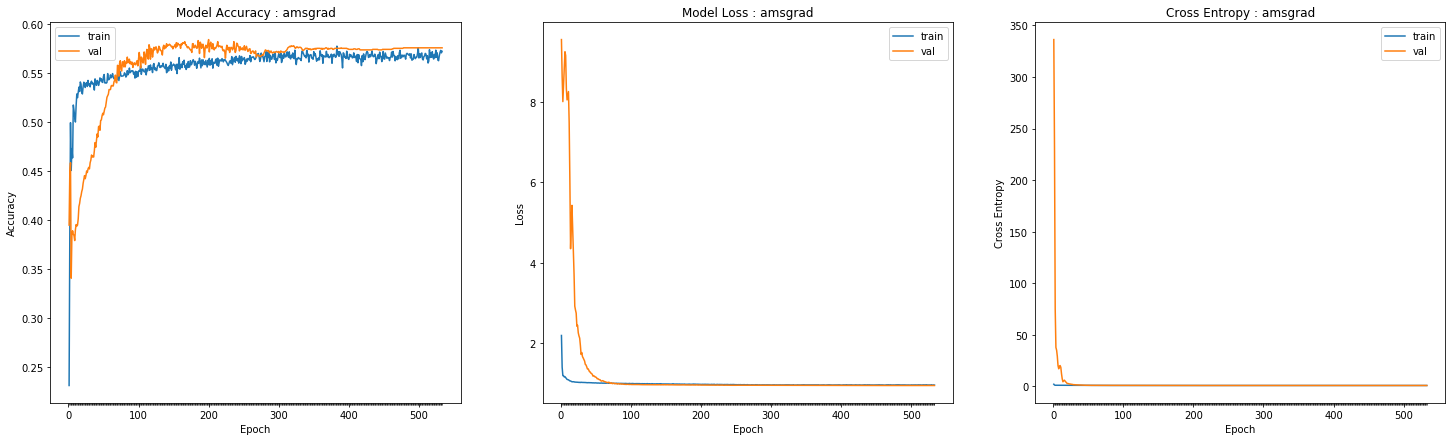

Confusion metrics for test data : amsgrad 

[[  0  13   6   1   0]
 [  0 175  75   1   0]
 [  0  50 109   8   0]
 [  0   4  42   8   0]
 [  0   2   4   2   0]]

Model Accuracy for test data : amsgrad 

0.584
INFO:tensorflow:Assets written to: amsgrad_0.584_4000_kullback_leibler_divergence_15-Sep-2020-00-41.tf/assets
The start time is : 5943.726820761 
The end time is : 6213.500467996 
The time difference is : 269.77364723499977






Evaluating modelAMSGRAD_30 
Nodes in layer 0 : 1024
Nodes in layer 1 : 256
Nodes in layer 2 : 64
Nodes in layer 3 : 16
Nodes in output layer : 5
Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.

Epoch: 0, accuracy:0.2984,  ce:1.7752,  loss:1.7752,  lr:0.1000,  val_accuracy:0.4711,  val_ce:33.2995,  val_loss:7.5332,  
....................................................................................................
Epoch: 100, accuracy:0.5491,  ce:0.9950,  loss:0.9950,  lr:0.1000,  val_accuracy:0.5747,  val_ce:0.9816, 

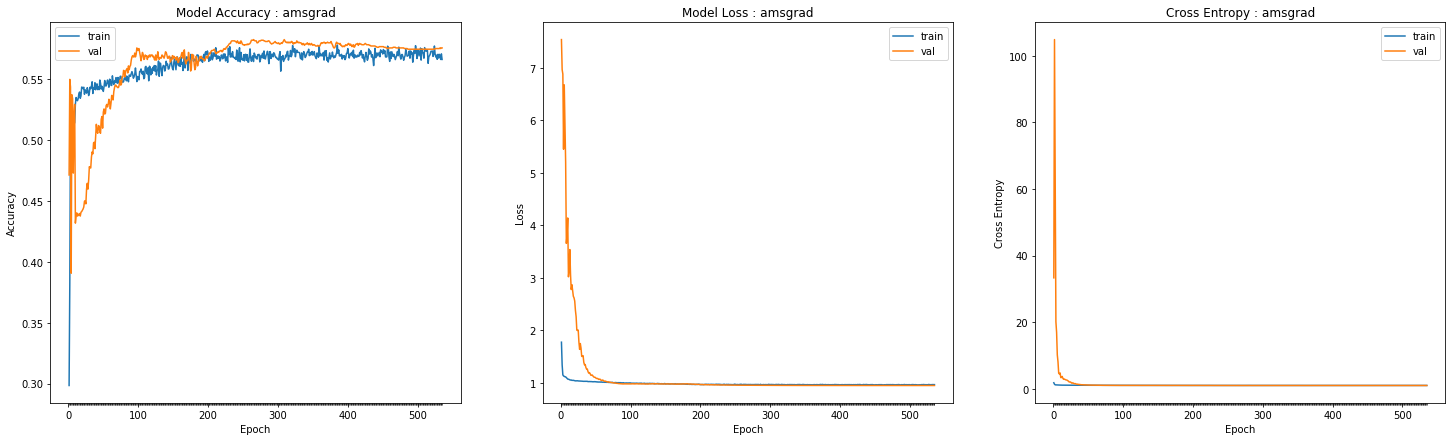

Confusion metrics for test data : amsgrad 

[[  0  13   6   1   0]
 [  1 182  66   2   0]
 [  0  49 111   7   0]
 [  0   3  40  11   0]
 [  0   1   3   4   0]]

Model Accuracy for test data : amsgrad 

0.608
INFO:tensorflow:Assets written to: amsgrad_0.608_4000_kullback_leibler_divergence_15-Sep-2020-00-46.tf/assets
The start time is : 6213.500617517 
The end time is : 6326.789819091 
The time difference is : 113.28920157399989






Evaluating modelAMSGRAD_31 
Nodes in layer 0 : 1024
Nodes in layer 1 : 512
Nodes in layer 2 : 256
Nodes in layer 3 : 128
Nodes in layer 4 : 64
Nodes in layer 5 : 32
Nodes in layer 6 : 16
Nodes in output layer : 5
Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.

Epoch: 0, accuracy:0.3092,  ce:2.1362,  loss:1.1709,  lr:0.1000,  val_accuracy:0.5116,  val_ce:21333.2148,  val_loss:0.9769,  
....................................................................................................
Epoch: 100, accuracy:0.5738,  ce:6

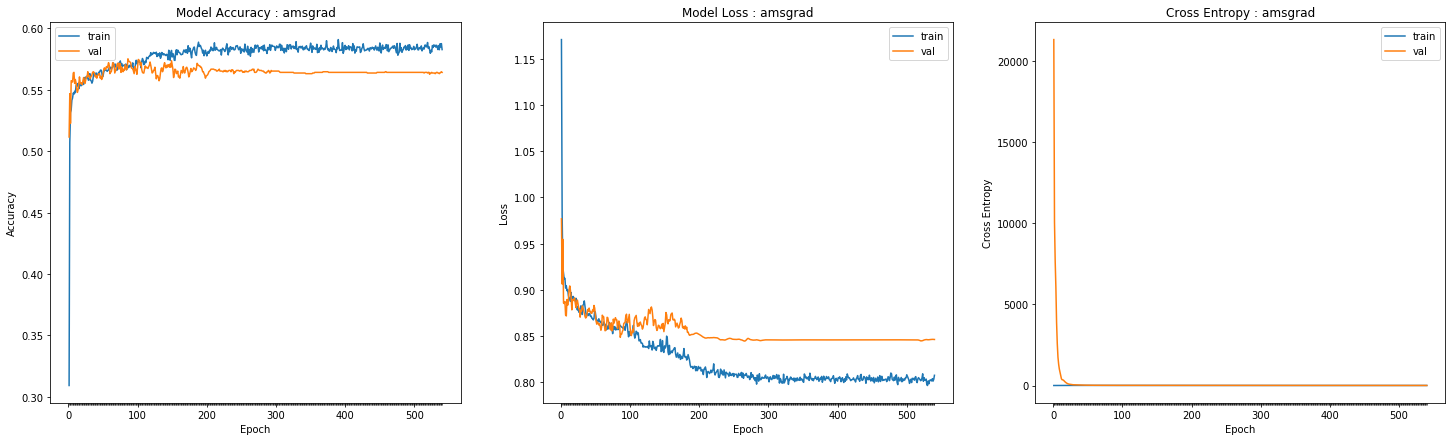

Confusion metrics for test data : amsgrad 

[[  0  13   7   0   0]
 [  0 182  69   0   0]
 [  0  53 113   1   0]
 [  0   3  49   2   0]
 [  0   1   6   1   0]]

Model Accuracy for test data : amsgrad 

0.594
INFO:tensorflow:Assets written to: amsgrad_0.594_4000_categorical_hinge_15-Sep-2020-00-48.tf/assets
The start time is : 6326.790065476 
The end time is : 6523.756269328 
The time difference is : 196.96620385200004






Evaluating modelAMSGRAD_32 
Nodes in layer 0 : 1024
Nodes in layer 1 : 512
Nodes in layer 2 : 256
Nodes in layer 3 : 128
Nodes in layer 4 : 64
Nodes in layer 5 : 32
Nodes in output layer : 5
Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.

Epoch: 0, accuracy:0.2999,  ce:1.9720,  loss:1.1641,  lr:0.1000,  val_accuracy:0.5189,  val_ce:13799.8213,  val_loss:0.9621,  
....................................................................................................
Epoch: 100, accuracy:0.5609,  ce:30.1112,  loss:0.8782,  lr:0.1000

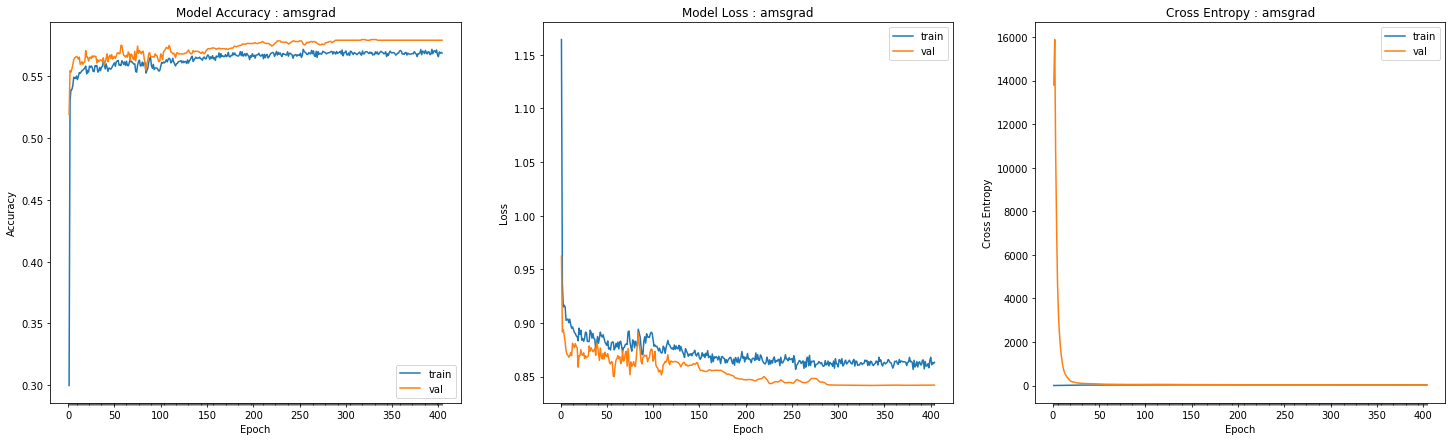

Confusion metrics for test data : amsgrad 

[[  0  12   8   0   0]
 [  0 186  65   0   0]
 [  0  54 113   0   0]
 [  0   2  52   0   0]
 [  0   0   8   0   0]]

Model Accuracy for test data : amsgrad 

0.598
INFO:tensorflow:Assets written to: amsgrad_0.598_4000_categorical_hinge_15-Sep-2020-00-51.tf/assets
The start time is : 6523.756538653 
The end time is : 6671.585098086 
The time difference is : 147.828559433






Evaluating modelAMSGRAD_33 
Nodes in layer 0 : 1024
Nodes in layer 1 : 512
Nodes in layer 2 : 256
Nodes in layer 3 : 128
Nodes in layer 4 : 64
Nodes in output layer : 5
Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.

Epoch: 0, accuracy:0.3083,  ce:2.2382,  loss:1.1591,  lr:0.1000,  val_accuracy:0.5068,  val_ce:6034.0132,  val_loss:0.9863,  
....................................................................................................
Epoch: 100, accuracy:0.5600,  ce:53.2731,  loss:0.8797,  lr:0.1000,  val_accuracy:0.5668,  val

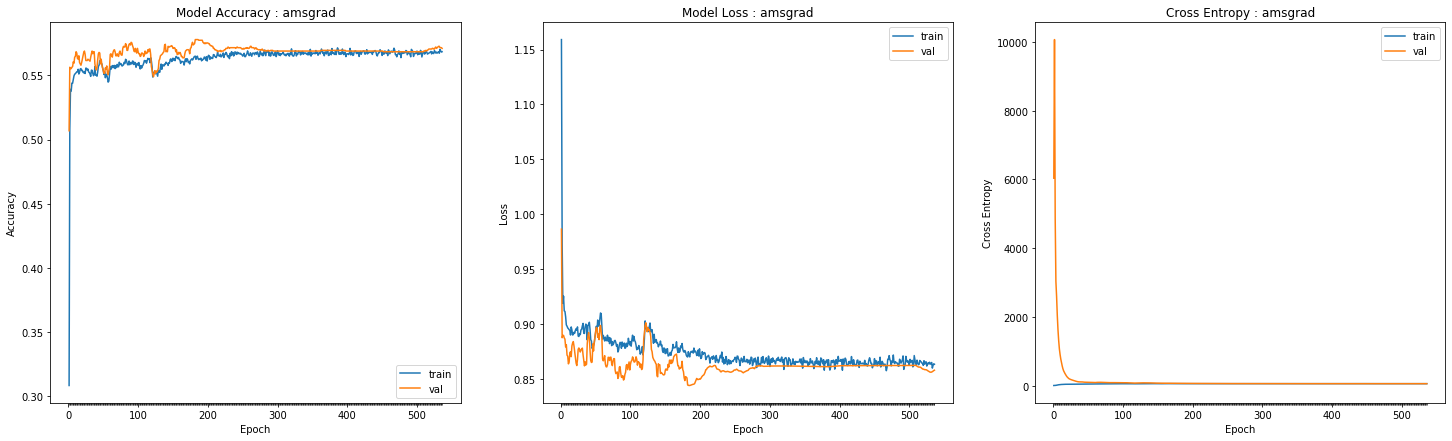

Confusion metrics for test data : amsgrad 

[[  0  12   8   0   0]
 [  0 187  64   0   0]
 [  0  57 110   0   0]
 [  0   2  52   0   0]
 [  0   0   8   0   0]]

Model Accuracy for test data : amsgrad 

0.594
INFO:tensorflow:Assets written to: amsgrad_0.594_4000_categorical_hinge_15-Sep-2020-00-53.tf/assets
The start time is : 6671.585315531 
The end time is : 6865.372841596 
The time difference is : 193.78752606500075






Evaluating modelAMSGRAD_34 
Nodes in layer 0 : 256
Nodes in layer 1 : 128
Nodes in layer 2 : 64
Nodes in layer 3 : 32
Nodes in layer 4 : 16
Nodes in output layer : 5
Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.

Epoch: 0, accuracy:0.3105,  ce:1.9668,  loss:1.1399,  lr:0.1000,  val_accuracy:0.5363,  val_ce:94.8573,  val_loss:0.9263,  
....................................................................................................
Epoch: 100, accuracy:0.5632,  ce:3.3807,  loss:0.8191,  lr:0.1000,  val_accuracy:0.5000,  val_

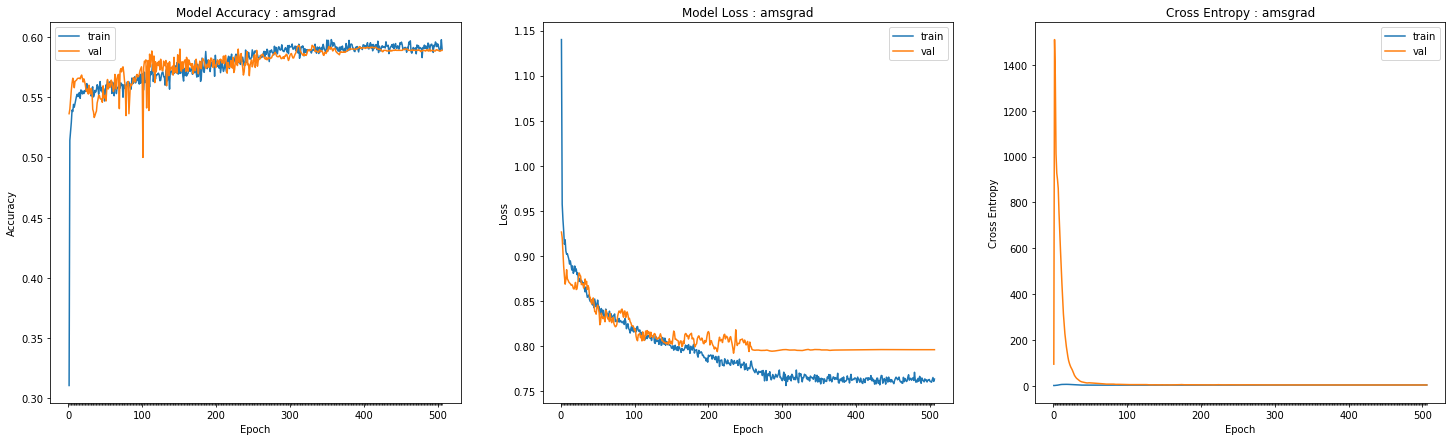

Confusion metrics for test data : amsgrad 

[[  0  16   4   0   0]
 [  0 183  66   2   0]
 [  0  65  97   5   0]
 [  0   5  41   8   0]
 [  0   1   6   1   0]]

Model Accuracy for test data : amsgrad 

0.576
INFO:tensorflow:Assets written to: amsgrad_0.576_4000_categorical_hinge_15-Sep-2020-00-56.tf/assets
The start time is : 6865.373046381 
The end time is : 6914.189262084 
The time difference is : 48.816215703000125






Evaluating modelAMSGRAD_35 
Nodes in layer 0 : 2048
Nodes in layer 1 : 512
Nodes in layer 2 : 128
Nodes in layer 3 : 32
Nodes in output layer : 5
Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.

Epoch: 0, accuracy:0.3182,  ce:2.0905,  loss:1.1465,  lr:0.1000,  val_accuracy:0.5084,  val_ce:994.2953,  val_loss:0.9822,  
....................................................................................................
Epoch: 100, accuracy:0.5647,  ce:34.3523,  loss:0.8704,  lr:0.1000,  val_accuracy:0.5642,  val_ce:47.7753,  val_l

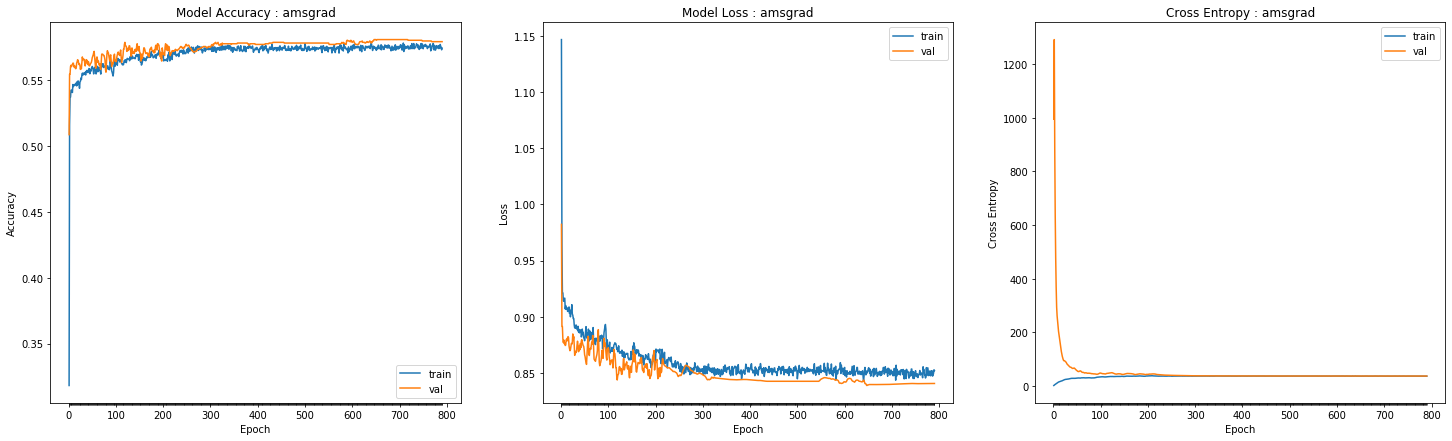

Confusion metrics for test data : amsgrad 

[[  0  12   8   0   0]
 [  0 183  68   0   0]
 [  0  55 112   0   0]
 [  0   3  51   0   0]
 [  0   1   7   0   0]]

Model Accuracy for test data : amsgrad 

0.59
INFO:tensorflow:Assets written to: amsgrad_0.59_4000_categorical_hinge_15-Sep-2020-00-57.tf/assets
The start time is : 6914.189475189 
The end time is : 7319.921376864 
The time difference is : 405.7319016749998






Evaluating modelAMSGRAD_36 
Nodes in layer 0 : 1024
Nodes in layer 1 : 256
Nodes in layer 2 : 64
Nodes in layer 3 : 16
Nodes in output layer : 5
Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.

Epoch: 0, accuracy:0.3643,  ce:1.7685,  loss:1.0700,  lr:0.1000,  val_accuracy:0.5084,  val_ce:265.7574,  val_loss:0.9812,  
....................................................................................................
Epoch: 100, accuracy:0.5812,  ce:4.5755,  loss:0.8044,  lr:0.1000,  val_accuracy:0.5984,  val_ce:8.2342,  val_loss:0.

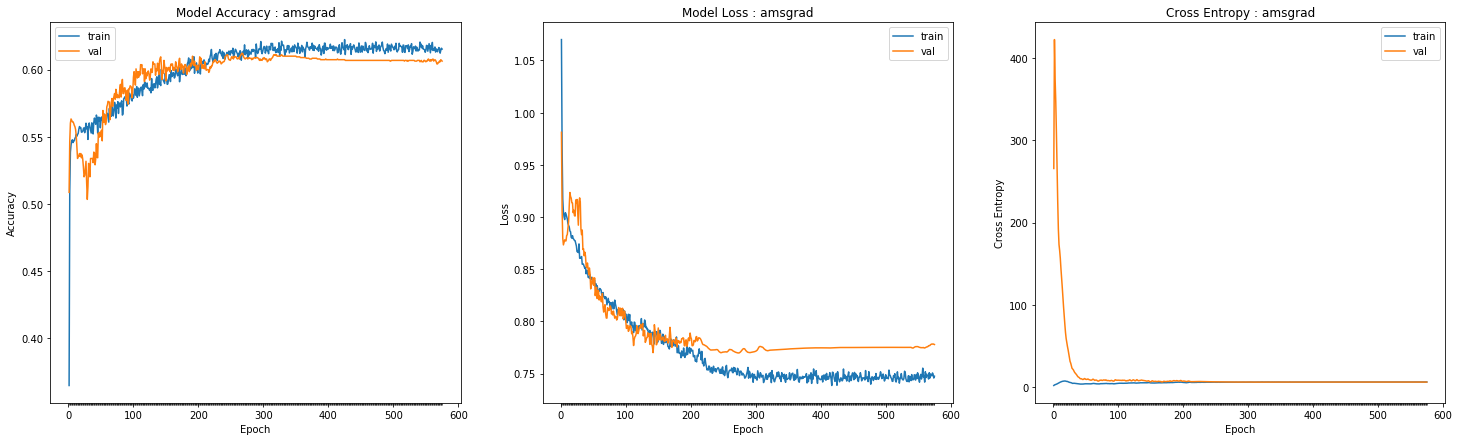

Confusion metrics for test data : amsgrad 

[[  0  15   5   0   0]
 [  0 186  62   3   0]
 [  0  60  97  10   0]
 [  0   2  37  15   0]
 [  0   2   1   5   0]]

Model Accuracy for test data : amsgrad 

0.596
INFO:tensorflow:Assets written to: amsgrad_0.596_4000_categorical_hinge_15-Sep-2020-01-04.tf/assets
The start time is : 7319.921611315 
The end time is : 7450.759537669 
The time difference is : 130.83792635400005






Evaluating modelAMSGRAD_37 
Nodes in layer 0 : 1024
Nodes in layer 1 : 512
Nodes in layer 2 : 256
Nodes in layer 3 : 128
Nodes in layer 4 : 64
Nodes in layer 5 : 32
Nodes in layer 6 : 16
Nodes in output layer : 5
Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.

Epoch: 0, accuracy:0.2318,  ce:1.9000,  loss:1.9000,  lr:0.1000,  val_accuracy:0.2132,  val_ce:566.3264,  val_loss:12.6412,  
....................................................................................................
Epoch: 100, accuracy:0.5592,  ce:0.9959,  los

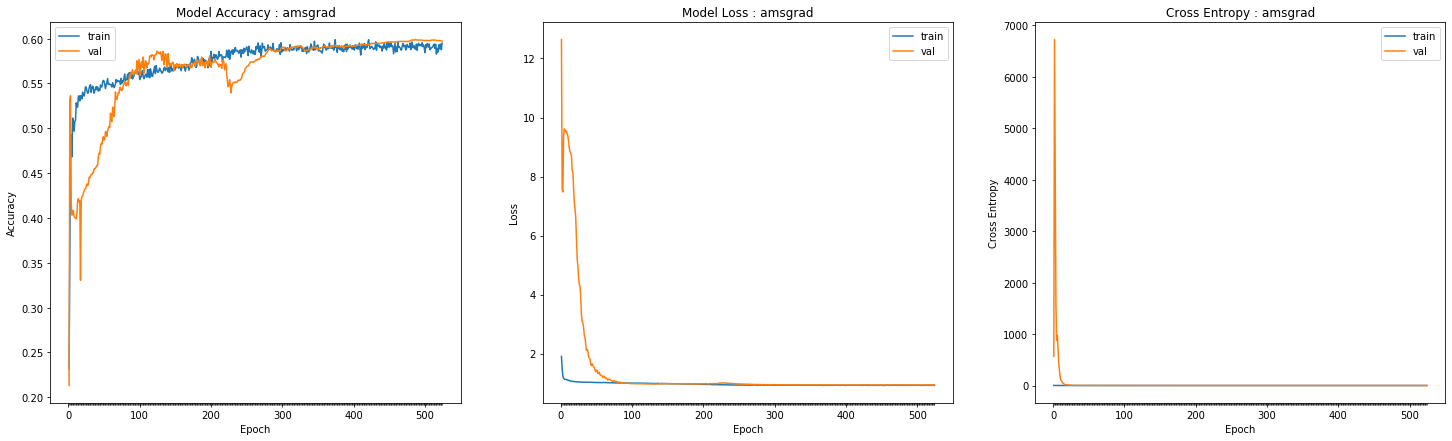

Confusion metrics for test data : amsgrad 

[[  0  13   6   1   0]
 [  3 174  73   1   0]
 [  0  51 112   4   0]
 [  0   2  41  11   0]
 [  0   1   1   6   0]]

Model Accuracy for test data : amsgrad 

0.594
INFO:tensorflow:Assets written to: amsgrad_0.594_4000_kullback_leibler_divergence_15-Sep-2020-01-06.tf/assets
The start time is : 7450.759718545 
The end time is : 7643.057555208 
The time difference is : 192.29783666299954






Evaluating modelAMSGRAD_38 
Nodes in layer 0 : 1024
Nodes in layer 1 : 512
Nodes in layer 2 : 256
Nodes in layer 3 : 128
Nodes in layer 4 : 64
Nodes in layer 5 : 32
Nodes in output layer : 5
Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.

Epoch: 0, accuracy:0.2297,  ce:2.1400,  loss:2.1400,  lr:0.1000,  val_accuracy:0.2789,  val_ce:3244.7234,  val_loss:11.6016,  
....................................................................................................
Epoch: 100, accuracy:0.5451,  ce:1.0213,  loss:1.0213,  

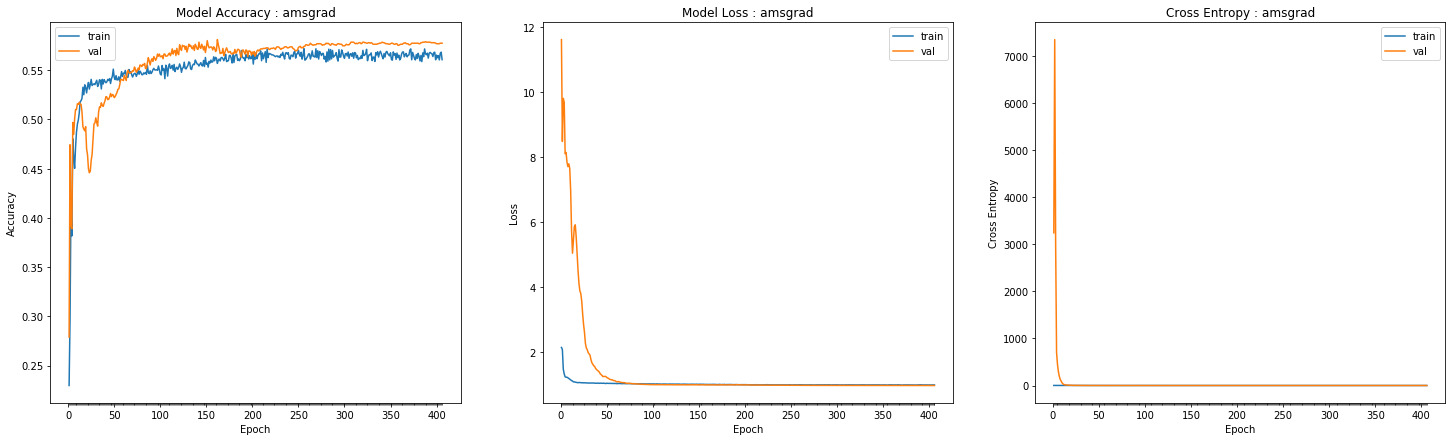

Confusion metrics for test data : amsgrad 

[[  0  12   7   1   0]
 [  0 167  82   2   0]
 [  0  48 113   6   0]
 [  0   2  43   9   0]
 [  0   0   5   3   0]]

Model Accuracy for test data : amsgrad 

0.578
INFO:tensorflow:Assets written to: amsgrad_0.578_4000_kullback_leibler_divergence_15-Sep-2020-01-09.tf/assets
The start time is : 7643.057750346 
The end time is : 7794.232459239 
The time difference is : 151.17470889299966






Evaluating modelAMSGRAD_39 
Nodes in layer 0 : 1024
Nodes in layer 1 : 512
Nodes in layer 2 : 256
Nodes in layer 3 : 128
Nodes in layer 4 : 64
Nodes in output layer : 5
Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.

Epoch: 0, accuracy:0.2441,  ce:2.5815,  loss:2.5812,  lr:0.1000,  val_accuracy:0.3832,  val_ce:4700.9263,  val_loss:9.9344,  
....................................................................................................
Epoch: 100, accuracy:0.5434,  ce:1.0046,  loss:1.0046,  lr:0.1000,  val_accurac

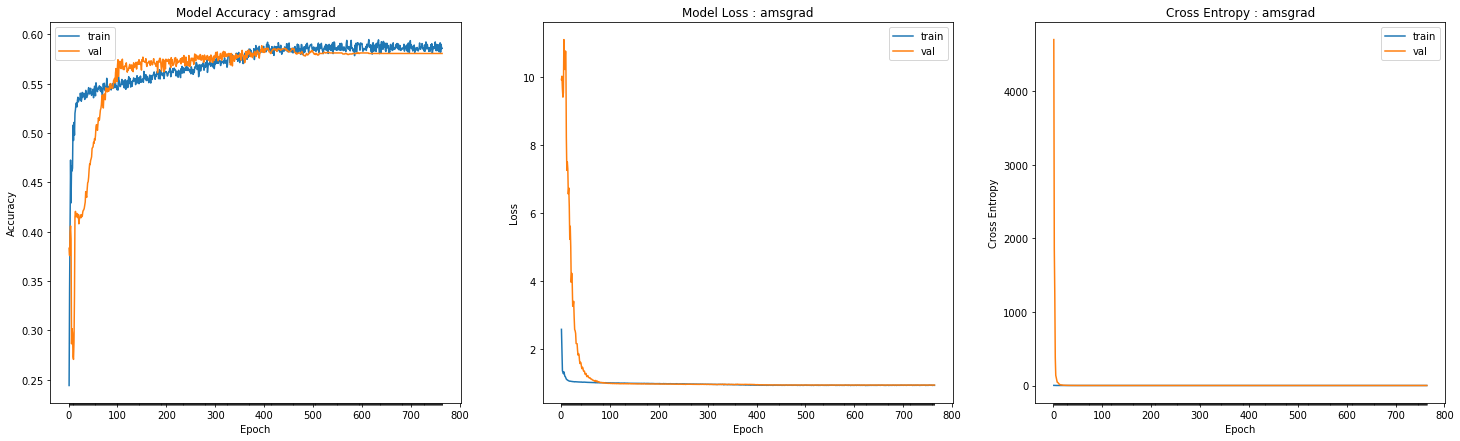

Confusion metrics for test data : amsgrad 

[[  0  14   5   1   0]
 [  2 179  69   1   0]
 [  1  54 105   7   0]
 [  0   6  36  12   0]
 [  0   1   2   5   0]]

Model Accuracy for test data : amsgrad 

0.592
INFO:tensorflow:Assets written to: amsgrad_0.592_4000_kullback_leibler_divergence_15-Sep-2020-01-12.tf/assets
The start time is : 7794.232645301 
The end time is : 8068.55566754 
The time difference is : 274.32302223900024






Evaluating modelAMSGRAD_40 
Nodes in layer 0 : 256
Nodes in layer 1 : 128
Nodes in layer 2 : 64
Nodes in layer 3 : 32
Nodes in layer 4 : 16
Nodes in output layer : 5
Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.

Epoch: 0, accuracy:0.2820,  ce:1.9285,  loss:1.9285,  lr:0.1000,  val_accuracy:0.5074,  val_ce:20.7503,  val_loss:7.1449,  
....................................................................................................
Epoch: 100, accuracy:0.5609,  ce:0.9912,  loss:0.9912,  lr:0.1000,  val_accuracy:0.56

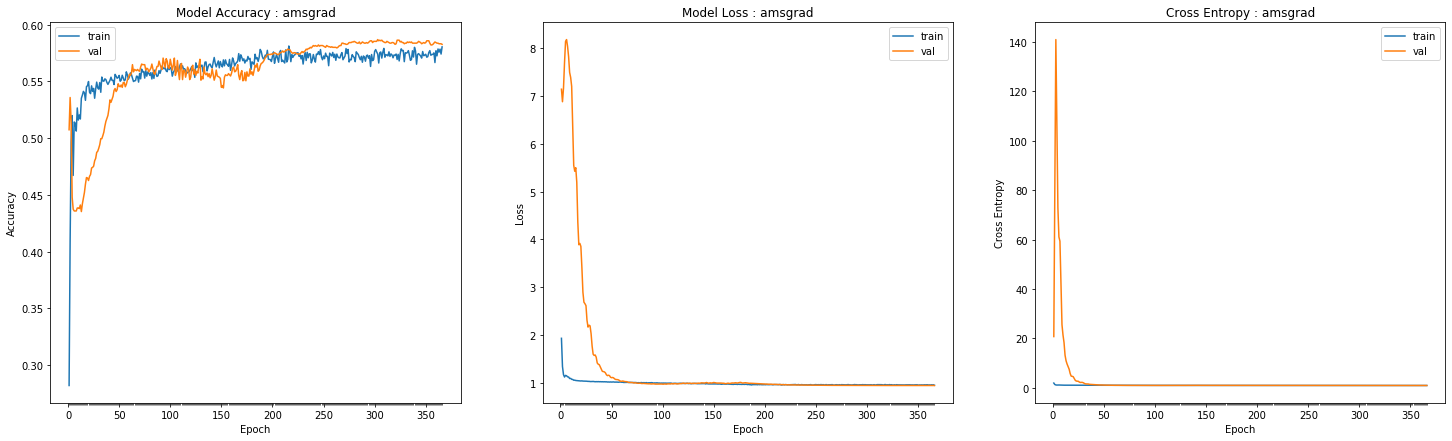

Confusion metrics for test data : amsgrad 

[[  0   9  10   1   0]
 [  0 140 110   1   0]
 [  0  33 128   6   0]
 [  0   0  45   9   0]
 [  0   0   4   4   0]]

Model Accuracy for test data : amsgrad 

0.554
INFO:tensorflow:Assets written to: amsgrad_0.554_4000_kullback_leibler_divergence_15-Sep-2020-01-17.tf/assets
The start time is : 8068.555830784 
The end time is : 8105.091678053 
The time difference is : 36.53584726899953






Evaluating modelAMSGRAD_41 
Nodes in layer 0 : 2048
Nodes in layer 1 : 512
Nodes in layer 2 : 128
Nodes in layer 3 : 32
Nodes in output layer : 5
Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.

Epoch: 0, accuracy:0.2204,  ce:2.1478,  loss:2.1478,  lr:0.1000,  val_accuracy:0.4668,  val_ce:236.8980,  val_loss:8.5053,  
....................................................................................................
Epoch: 100, accuracy:0.5459,  ce:0.9977,  loss:0.9977,  lr:0.1000,  val_accuracy:0.5558,  val_ce:0.9839,

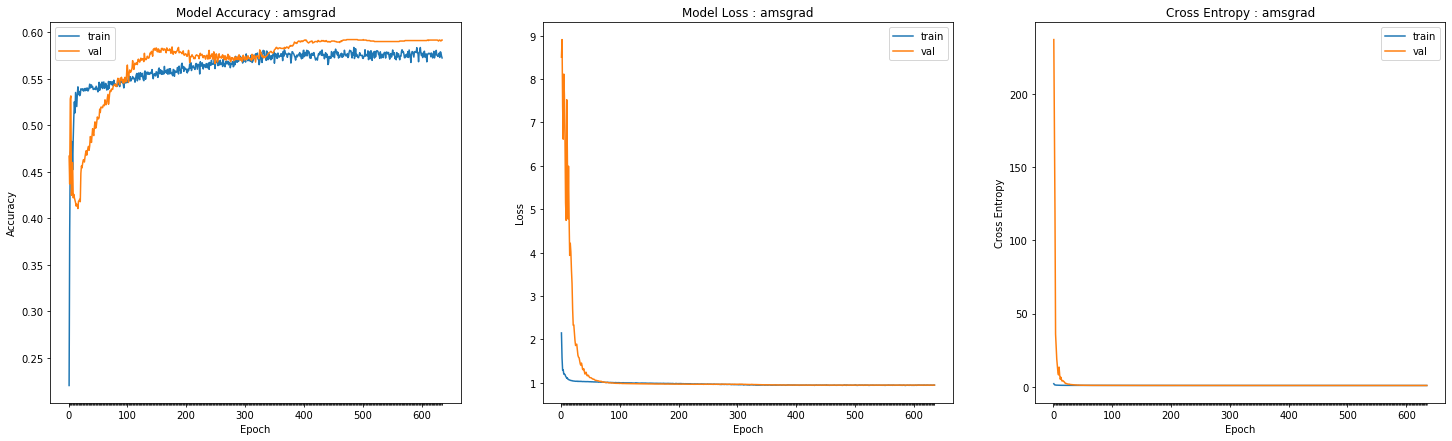

Confusion metrics for test data : amsgrad 

[[  0  11   8   1   0]
 [  4 178  67   2   0]
 [  0  50 110   7   0]
 [  0   3  39  12   0]
 [  0   1   2   5   0]]

Model Accuracy for test data : amsgrad 

0.6
INFO:tensorflow:Assets written to: amsgrad_0.6_4000_kullback_leibler_divergence_15-Sep-2020-01-17.tf/assets
The start time is : 8105.091883427 
The end time is : 8430.425642616 
The time difference is : 325.33375918899947






Evaluating modelAMSGRAD_42 
Nodes in layer 0 : 1024
Nodes in layer 1 : 256
Nodes in layer 2 : 64
Nodes in layer 3 : 16
Nodes in output layer : 5
Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.

Epoch: 0, accuracy:0.3482,  ce:1.6200,  loss:1.6200,  lr:0.1000,  val_accuracy:0.4121,  val_ce:69.3474,  val_loss:9.1323,  
....................................................................................................
Epoch: 100, accuracy:0.5503,  ce:1.0048,  loss:1.0048,  lr:0.1000,  val_accuracy:0.5642,  val_ce:0.9840,  val

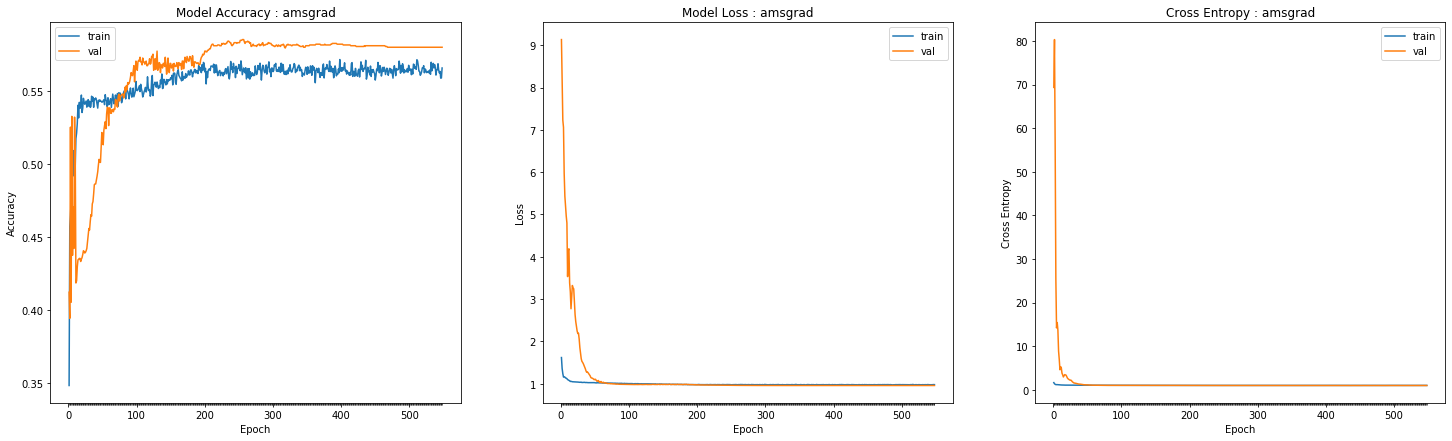

Confusion metrics for test data : amsgrad 

[[  0  13   6   1   0]
 [  0 185  65   1   0]
 [  0  56 102   9   0]
 [  0   4  40  10   0]
 [  0   1   3   4   0]]

Model Accuracy for test data : amsgrad 

0.594
INFO:tensorflow:Assets written to: amsgrad_0.594_4000_kullback_leibler_divergence_15-Sep-2020-01-23.tf/assets
The start time is : 8430.425823369 
The end time is : 8554.729904508 
The time difference is : 124.30408113900012






Evaluating modelAMSGRAD_43 
Nodes in layer 0 : 1024
Nodes in layer 1 : 512
Nodes in layer 2 : 256
Nodes in layer 3 : 128
Nodes in layer 4 : 64
Nodes in layer 5 : 32
Nodes in layer 6 : 16
Nodes in output layer : 5
Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.

Epoch: 0, accuracy:0.2974,  ce:1.9113,  loss:1.1718,  lr:0.1000,  val_accuracy:0.3942,  val_ce:12184.4375,  val_loss:1.2112,  
....................................................................................................
Epoch: 100, accuracy:0.5704,  ce:1

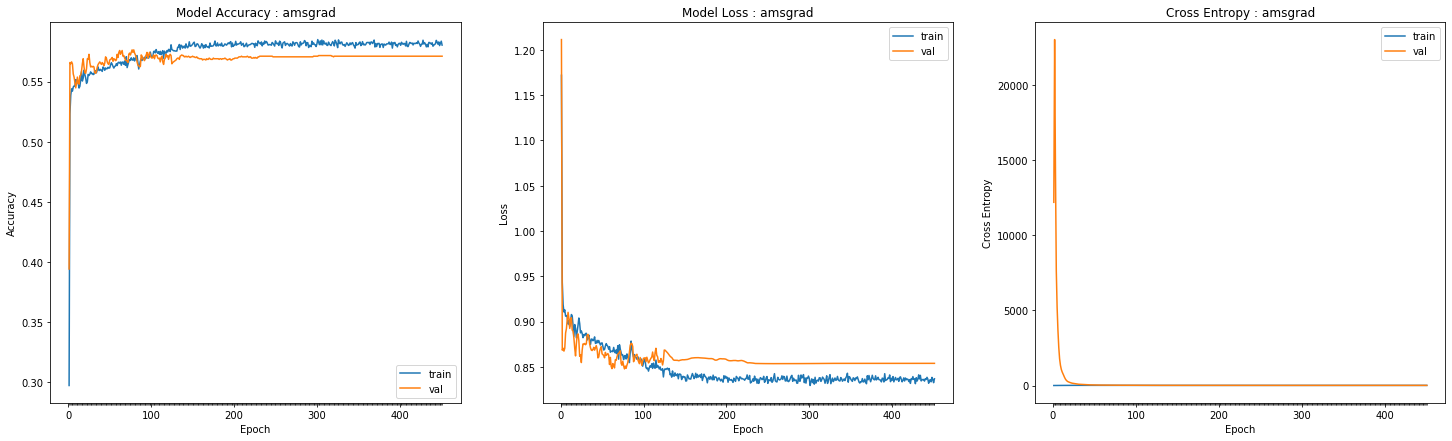

Confusion metrics for test data : amsgrad 

[[  0  12   8   0   0]
 [  0 190  61   0   0]
 [  0  58 109   0   0]
 [  0   3  51   0   0]
 [  0   2   6   0   0]]

Model Accuracy for test data : amsgrad 

0.598
INFO:tensorflow:Assets written to: amsgrad_0.598_4000_categorical_hinge_15-Sep-2020-01-25.tf/assets
The start time is : 8554.730122885 
The end time is : 8723.759937246 
The time difference is : 169.02981436100163






Evaluating modelAMSGRAD_44 
Nodes in layer 0 : 1024
Nodes in layer 1 : 512
Nodes in layer 2 : 256
Nodes in layer 3 : 128
Nodes in layer 4 : 64
Nodes in layer 5 : 32
Nodes in output layer : 5
Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.

Epoch: 0, accuracy:0.3439,  ce:2.0346,  loss:1.1258,  lr:0.1000,  val_accuracy:0.5521,  val_ce:9835.1104,  val_loss:0.8958,  
....................................................................................................
Epoch: 100, accuracy:0.5659,  ce:21.5057,  loss:0.8681,  lr:0.1000,

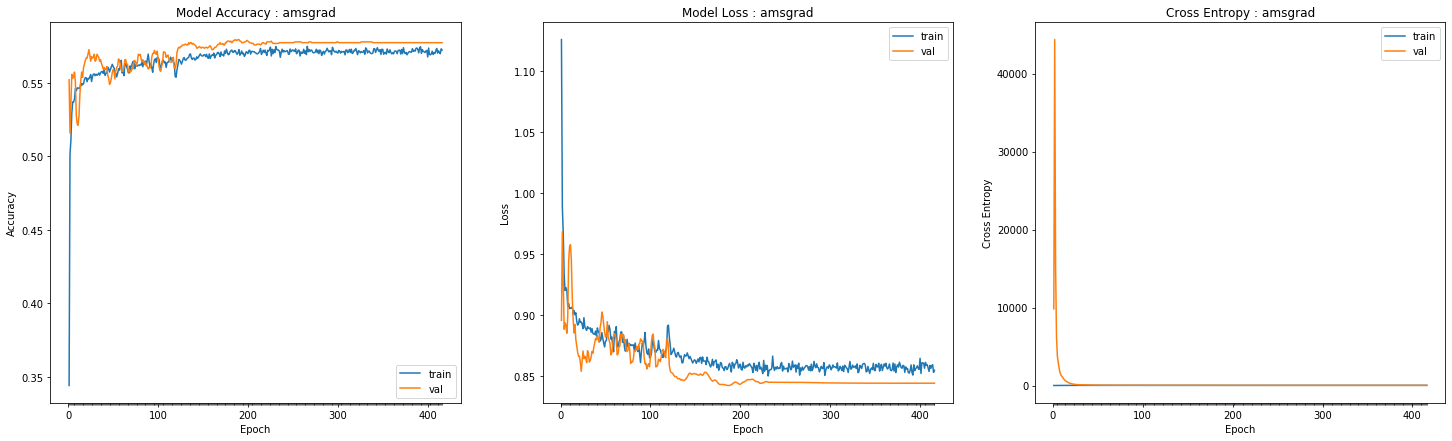

Confusion metrics for test data : amsgrad 

[[  0  12   8   0   0]
 [  0 190  61   0   0]
 [  0  57 110   0   0]
 [  0   4  50   0   0]
 [  0   2   6   0   0]]

Model Accuracy for test data : amsgrad 

0.6
INFO:tensorflow:Assets written to: amsgrad_0.6_4000_categorical_hinge_15-Sep-2020-01-27.tf/assets
The start time is : 8723.760128292 
The end time is : 8877.768990282 
The time difference is : 154.0088619899998






Evaluating modelAMSGRAD_45 
Nodes in layer 0 : 1024
Nodes in layer 1 : 512
Nodes in layer 2 : 256
Nodes in layer 3 : 128
Nodes in layer 4 : 64
Nodes in output layer : 5
Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.

Epoch: 0, accuracy:0.3270,  ce:2.1551,  loss:1.1486,  lr:0.1000,  val_accuracy:0.4563,  val_ce:7770.1025,  val_loss:1.0873,  
....................................................................................................
Epoch: 100, accuracy:0.5559,  ce:52.8830,  loss:0.8878,  lr:0.1000,  val_accuracy:0.5605,  val

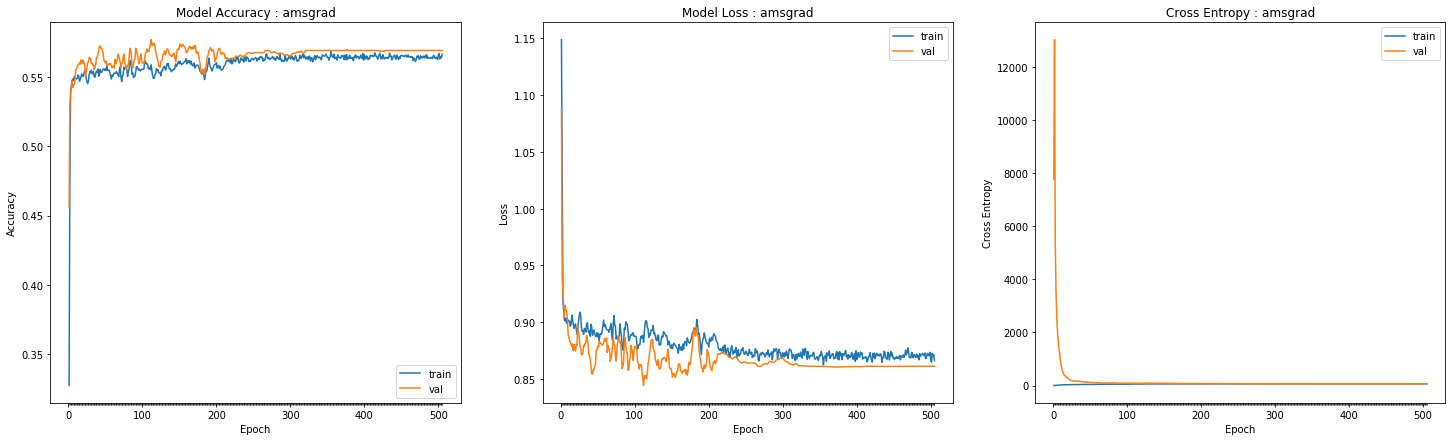

Confusion metrics for test data : amsgrad 

[[  0  12   8   0   0]
 [  0 187  64   0   0]
 [  0  56 111   0   0]
 [  0   4  50   0   0]
 [  0   1   7   0   0]]

Model Accuracy for test data : amsgrad 

0.596
INFO:tensorflow:Assets written to: amsgrad_0.596_4000_categorical_hinge_15-Sep-2020-01-30.tf/assets
The start time is : 8877.769226522 
The end time is : 9060.682825737 
The time difference is : 182.91359921500043






Evaluating modelAMSGRAD_46 
Nodes in layer 0 : 256
Nodes in layer 1 : 128
Nodes in layer 2 : 64
Nodes in layer 3 : 32
Nodes in layer 4 : 16
Nodes in output layer : 5
Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.

Epoch: 0, accuracy:0.3112,  ce:1.8377,  loss:1.1374,  lr:0.1000,  val_accuracy:0.5468,  val_ce:98.1729,  val_loss:0.9045,  
....................................................................................................
Epoch: 100, accuracy:0.5725,  ce:7.8594,  loss:0.8510,  lr:0.1000,  val_accuracy:0.5711,  val_

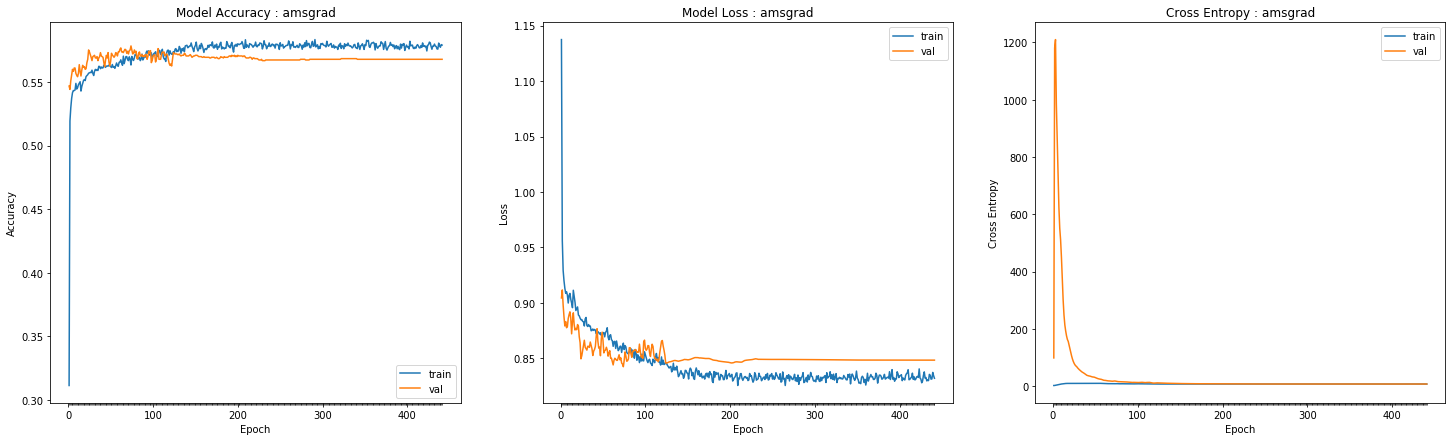

Confusion metrics for test data : amsgrad 

[[  0  13   7   0   0]
 [  0 188  63   0   0]
 [  0  57 110   0   0]
 [  0   3  51   0   0]
 [  0   2   6   0   0]]

Model Accuracy for test data : amsgrad 

0.596
INFO:tensorflow:Assets written to: amsgrad_0.596_4000_categorical_hinge_15-Sep-2020-01-33.tf/assets
The start time is : 9060.6830368 
The end time is : 9101.430972614 
The time difference is : 40.74793581400081






Evaluating modelAMSGRAD_47 
Nodes in layer 0 : 2048
Nodes in layer 1 : 512
Nodes in layer 2 : 128
Nodes in layer 3 : 32
Nodes in output layer : 5
Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.

Epoch: 0, accuracy:0.3401,  ce:2.0792,  loss:1.1192,  lr:0.1000,  val_accuracy:0.5353,  val_ce:579.0814,  val_loss:0.9276,  
....................................................................................................
Epoch: 100, accuracy:0.5658,  ce:28.0659,  loss:0.8680,  lr:0.1000,  val_accuracy:0.5737,  val_ce:37.6568,  val_loss

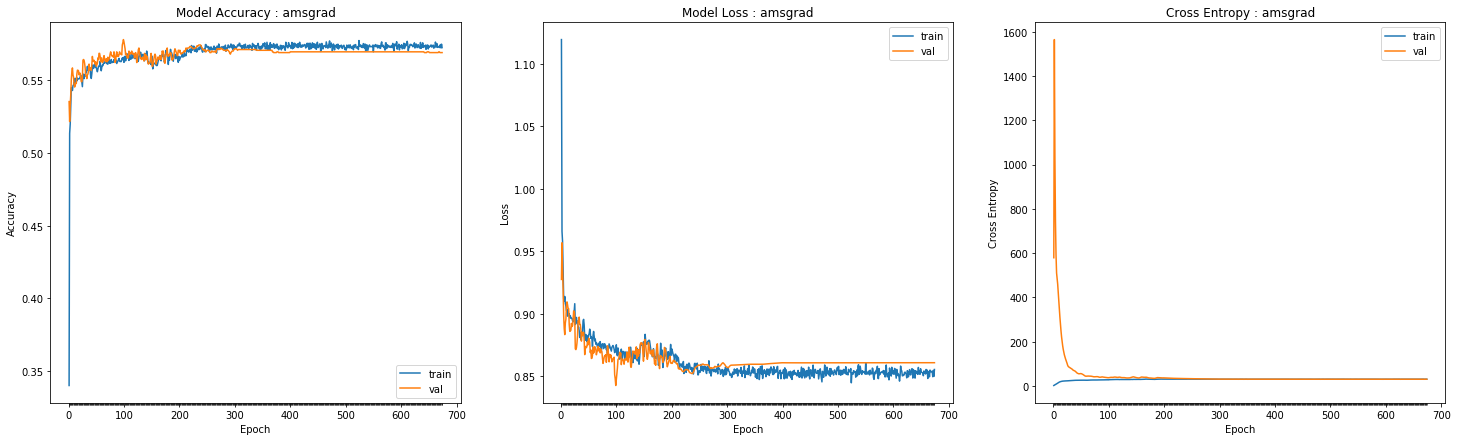

Confusion metrics for test data : amsgrad 

[[  0  12   8   0   0]
 [  0 195  56   0   0]
 [  0  59 108   0   0]
 [  0   5  49   0   0]
 [  0   1   7   0   0]]

Model Accuracy for test data : amsgrad 

0.606
INFO:tensorflow:Assets written to: amsgrad_0.606_4000_categorical_hinge_15-Sep-2020-01-34.tf/assets
The start time is : 9101.431188109 
The end time is : 9444.138818058 
The time difference is : 342.70762994899997






Evaluating modelAMSGRAD_48 
Nodes in layer 0 : 1024
Nodes in layer 1 : 256
Nodes in layer 2 : 64
Nodes in layer 3 : 16
Nodes in output layer : 5
Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.

Epoch: 0, accuracy:0.2961,  ce:1.7771,  loss:1.1512,  lr:0.1000,  val_accuracy:0.5216,  val_ce:195.4269,  val_loss:0.9552,  
....................................................................................................
Epoch: 100, accuracy:0.5875,  ce:4.8578,  loss:0.7981,  lr:0.1000,  val_accuracy:0.5826,  val_ce:8.4255,  val_loss

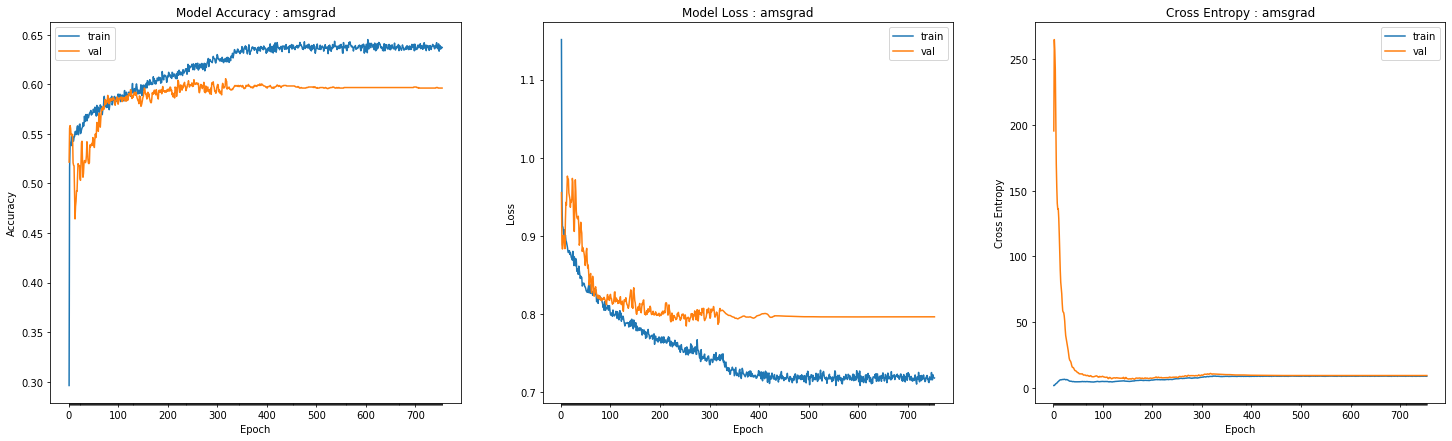

Confusion metrics for test data : amsgrad 

[[  0  17   3   0   0]
 [  2 190  55   4   0]
 [  0  64  91  12   0]
 [  0   6  36  12   0]
 [  0   1   2   5   0]]

Model Accuracy for test data : amsgrad 

0.586
INFO:tensorflow:Assets written to: amsgrad_0.586_4000_categorical_hinge_15-Sep-2020-01-39.tf/assets
The start time is : 9444.138972126 
The end time is : 9609.485410085 
The time difference is : 165.34643795900047



{'modelADAM_1': {'id': 1, 'optimizer': 'ADAM', 'callbaks': [<tensorflow.python.keras.callbacks.ReduceLROnPlateau object at 0x7ff36ae42150>, <tensorflow.python.keras.callbacks.LearningRateScheduler object at 0x7ff371d54d90>, <tensorflow_docs.modeling.EpochDots object at 0x7ff36a0a6a10>, <tensorflow.python.keras.callbacks.EarlyStopping object at 0x7ff36a0a6b90>, <tensorflow.python.keras.callbacks.ModelCheckpoint object at 0x7ff371e5d6d0>], 'epochs': 2000, 'batchSize': 4000, 'validationSplit': 0.2, 'lossFunction': 'kullback_leibler_divergence', 'layers': 7, 'power': 10, '

In [ ]:
# Train and Evaluate Models

# callbacks=[reduce_lr,early_stop,EpochDots]
# callbacks=[reduce_lr,schedule_lr,EpochDots]
callbacks_list=[[reduce_lr,schedule_lr,EpochDots, early_stop,ModelCP],[reset_lr,reduce_lr,early_stop,EpochDots,ModelCP]]
epochs = 2000
batch_list = [4000]
valsplit_list = [0.2]
lossfunc_list= ['kullback_leibler_divergence',"categorical_hinge"]
metrics=['accuracy','ce']
layers_power_multiplier_list = [[7,10,1],[6,10,1],[5,10,1],[5,8,1],[4,11,2],[4,10,2]]
model_comparision = dict()
id = 1
# m = simple_nn(input_nodes, output_nodes, layers, powerof2)

for k, v in optis.items():
  for callbacks in callbacks_list:
    for batch in batch_list:
      for valsplit in valsplit_list:
        for lossfunc in lossfunc_list:
          for layers_power_multiplier in layers_power_multiplier_list:
            layers = layers_power_multiplier[0]
            powerof2 = layers_power_multiplier[1]
            multiplier = layers_power_multiplier[2]
            name = 'model{}_{}'.format(k.upper(),id)
            print("\n\n\nEvaluating {} ".format(name))
            print("============================================================================================")
            starttime = timeit.default_timer()
            testAccuracy = evalModel(name,k,v,epochs,batch,valsplit,callbacks,train_x, test_x, train_y, test_y, lossfunc, metrics,input_nodes, output_nodes, layers, powerof2, multiplier)
            endtime = timeit.default_timer()
            print("The start time is : {} \nThe end time is : {} \nThe time difference is : {}".format(starttime,endtime,endtime - starttime))
            print("============================================================================================\n\n\n")
            model_comparision.update({name: {'id':id,'optimizer':k.upper(), 'callbaks':callbacks, 
                                                           'epochs': epochs, 'batchSize': batch, 'validationSplit': valsplit, 
                                                           'lossFunction': lossfunc, 'layers': layers, 'power':powerof2,
                                                           'multiplier' : multiplier, 'testAccuracy': testAccuracy, 'timeTaken':  endtime - starttime}})
            id += 1


print(model_comparision)


### Analysis of trained models.

In [ ]:
mod_comp = pd.DataFrame(model_comparision)

In [ ]:
mod_comp = mod_comp.T
mod_comp.head()

id optimizer                                           callbaks  \
modelADAM_1  1      ADAM  [<tensorflow.python.keras.callbacks.ReduceLROn...   
modelADAM_2  2      ADAM  [<tensorflow.python.keras.callbacks.ReduceLROn...   
modelADAM_3  3      ADAM  [<tensorflow.python.keras.callbacks.ReduceLROn...   
modelADAM_4  4      ADAM  [<tensorflow.python.keras.callbacks.ReduceLROn...   
modelADAM_5  5      ADAM  [<tensorflow.python.keras.callbacks.ReduceLROn...   

            epochs batchSize validationSplit                 lossFunction  \
modelADAM_1   2000      4000             0.2  kullback_leibler_divergence   
modelADAM_2   2000      4000             0.2  kullback_leibler_divergence   
modelADAM_3   2000      4000             0.2  kullback_leibler_divergence   
modelADAM_4   2000      4000             0.2  kullback_leibler_divergence   
modelADAM_5   2000      4000             0.2  kullback_leibler_divergence   

            layers power multiplier testAccuracy timeTaken  
modelADAM_1      7    10          1        0.564   294.264  
modelADAM_2      6    10          1         0.58   224.047  
modelADAM_3      5    10          1        0.588    704.79  
modelADAM_4      5     8          1         0.61    57.912  
modelADAM_5      4    11          2        0.592   284.705

In [ ]:
mod_comp.describe()

id optimizer                                           callbaks  \
count   48        48                                                 48   
unique  48         2                                                  2   
top     48      ADAM  [<tensorflow.python.keras.callbacks.ReduceLROn...   
freq     1        24                                                 24   

        epochs  batchSize  validationSplit                 lossFunction  \
count       48         48             48.0                           48   
unique       1          1              1.0                            2   
top       2000       4000              0.2  kullback_leibler_divergence   
freq        48         48             48.0                           24   

        layers  power  multiplier  testAccuracy   timeTaken  
count       48     48          48        48.000   48.000000  
unique       4      3           2        21.000   48.000000  
top          5     10           1         0.594  319.161448  
freq        16     32          32         6.000    1.000000

In [ ]:
print(mod_comp.dtypes)
convert_dict = {'testAccuracy': float, 
                'timeTaken': float} 
mod_comp = mod_comp.astype(convert_dict) 
mod_comp_noCallbacks = mod_comp.drop(columns=['callbaks'],axis=1)
print(mod_comp_noCallbacks.dtypes)

id                 object
optimizer          object
callbaks           object
epochs             object
batchSize          object
validationSplit    object
lossFunction       object
layers             object
power              object
multiplier         object
testAccuracy       object
timeTaken          object
dtype: object
id                  object
optimizer           object
epochs              object
batchSize           object
validationSplit     object
lossFunction        object
layers              object
power               object
multiplier          object
testAccuracy       float64
timeTaken          float64
dtype: object


#### Analyze the top 10 models by accuracy and least time take to train the model.

In [ ]:
top_acc = 10
least_time = 10

print(mod_comp_noCallbacks.nlargest(top_acc,['testAccuracy'])[['testAccuracy','timeTaken']])
print(mod_comp_noCallbacks.nsmallest(least_time,['timeTaken'])[['testAccuracy','timeTaken']])

                 testAccuracy   timeTaken
modelADAM_9             0.616  102.364466
modelADAM_4             0.610   57.912009
modelAMSGRAD_30         0.608  113.289202
modelAMSGRAD_47         0.606  342.707630
modelAMSGRAD_28         0.604   44.684452
modelADAM_8             0.600  168.505804
modelADAM_18            0.600  126.263897
modelAMSGRAD_41         0.600  325.333759
modelAMSGRAD_44         0.600  154.008862
modelAMSGRAD_32         0.598  147.828559
                 testAccuracy   timeTaken
modelAMSGRAD_40         0.554   36.535847
modelAMSGRAD_46         0.596   40.747936
modelAMSGRAD_28         0.604   44.684452
modelAMSGRAD_34         0.576   48.816216
modelADAM_16            0.592   55.655188
modelADAM_4             0.610   57.912009
modelADAM_22            0.584   62.674638
modelADAM_10            0.578   67.508168
modelADAM_21            0.596   83.496055
modelADAM_9             0.616  102.364466


**Based on the above following models have taken least time and are having better test accuracy thus would select those for further analysis**

|Model ID | Test Accuracy | Time taken | Confusion Metrics | 
|:---: |:---: |:---: |:---: |
| modelADAM_9 | 0.616 | 102.364466 | Confusion metrics for test data : adam<br>[[  0  12   8   0   0]<br> [  0 200  51   0   0]<br> [  0  59 108   0   0]<br> [  0  11  43   0   0]<br> [  0   1   7   0   0]] |
| modelADAM_4 | 0.610 | 57.912009 | Confusion metrics for test data : adam <br>[[  0  12   7   1   0]<br> [  5 178  65   3   0]<br> [  0  47 112   8   0]<br> [  0   2  37  15   0]<br> [  0   1   1   6   0]]<br> |
| modelAMSGRAD_28 | 0.604 | 44.684452 |Confusion metrics for test data : amsgrad <br>[[  0  14   5   1   0]<br> [  5 178  65   3   0]<br> [  1  49 112   5   0]<br> [  0   5  37  12   0]<br> [  0   0   4   4   0]] |
| modelAMSGRAD_30 | 0.608 | 113.289202 | Confusion metrics for test data : amsgrad <br>[[  0  13   6   1   0]<br> [  1 182  66   2   0]<br> [  0  49 111   7   0]<br> [  0   3  40  11   0]<br> [  0   1   3   4   0]]|



In [ ]:
print(list(mod_comp_noCallbacks.nlargest(top_acc,['testAccuracy']).index))
print(list(mod_comp_noCallbacks.nsmallest(least_time,['timeTaken']).index))

['modelADAM_9', 'modelADAM_4', 'modelAMSGRAD_30', 'modelAMSGRAD_47', 'modelAMSGRAD_28', 'modelADAM_8', 'modelADAM_18', 'modelAMSGRAD_41', 'modelAMSGRAD_44', 'modelAMSGRAD_32']
['modelAMSGRAD_40', 'modelAMSGRAD_46', 'modelAMSGRAD_28', 'modelAMSGRAD_34', 'modelADAM_16', 'modelADAM_4', 'modelADAM_22', 'modelADAM_10', 'modelADAM_21', 'modelADAM_9']


In [ ]:
print(mod_comp_noCallbacks.nlargest(top_acc,['testAccuracy']))
print(mod_comp_noCallbacks.nsmallest(least_time,['timeTaken']))

                 id optimizer epochs batchSize validationSplit  \
modelADAM_9       9      ADAM   2000      4000             0.2   
modelADAM_4       4      ADAM   2000      4000             0.2   
modelAMSGRAD_30  30   AMSGRAD   2000      4000             0.2   
modelAMSGRAD_47  47   AMSGRAD   2000      4000             0.2   
modelAMSGRAD_28  28   AMSGRAD   2000      4000             0.2   
modelADAM_8       8      ADAM   2000      4000             0.2   
modelADAM_18     18      ADAM   2000      4000             0.2   
modelAMSGRAD_41  41   AMSGRAD   2000      4000             0.2   
modelAMSGRAD_44  44   AMSGRAD   2000      4000             0.2   
modelAMSGRAD_32  32   AMSGRAD   2000      4000             0.2   

                                lossFunction layers power multiplier  \
modelADAM_9                categorical_hinge      5    10          1   
modelADAM_4      kullback_leibler_divergence      5     8          1   
modelAMSGRAD_30  kullback_leibler_divergence      4    10

Following are the hyper params for the selected models


|Model ID | Test Accuracy | Time taken | Optimizer | Validation Split | Loss Func | Layers | Power | Multiplier | Comments |Layers/Node |
|:---: |:---: |:---: |:---: |:---: |:---: |:---: |:---: |:---: |:---: |:---: |
| modelADAM_9 | 0.616 | 102.364466 | ADAM | 0.2 | categorical_hinge | 5 | 10 | 1 | Relatively Good Accuracy but slightly higher time | Nodes in layer 0 : 1024<br>Nodes in layer 1 : 512<br>Nodes in layer 2 : 256<br>Nodes in layer 3 : 128<br>Nodes in layer 4 : 64<br>Nodes in output layer : 5|
| modelADAM_4 | 0.610 | 57.912009 | ADAM | 0.2 | kullback_leibler_divergence | 5 | 8 | 1 | Relatively Good Accuracy and lower time | Nodes in layer 0 : 256 <br> Nodes in layer 1 : 128 <br>  Nodes in layer 2 : 64 <br>  Nodes in layer 3 : 32 <br>  Nodes in layer 4 : 16 <br>  Nodes in output layer : 5|
| modelAMSGRAD_28 | 0.604 | 44.684452 | AMSGRAD | 0.2 | kullback_leibler_divergence | 5 | 8 | 1 | Relatively Good Accuracy and lower time, almost similar model to above modelADAM_4, better time with slightly reduced accuracy |Nodes in layer 0 : 256<br>Nodes in layer 1 : 128<br>Nodes in layer 2 : 64<br>Nodes in layer 3 : 32<br>Nodes in layer 4 : 16<br>Nodes in output layer : 5 |
| modelAMSGRAD_30 | 0.608 | 113.289202 | AMSGRAD | 0.2 | kullback_leibler_divergence | 4 | 10| 2 | Relatively Good Accuracy and but higher time. | Nodes in layer 0 : 1024<br>Nodes in layer 1 : 256<br>Nodes in layer 2 : 64<br>Nodes in layer 3 : 16<br>Nodes in output layer : 5|

Training History plots for the above models

modelADAM_9
![](https://github.com/dhp6106/insaid-projects/blob/master/AI_Foundation/DEFCON-Multiclass/modelADAM_9.png?raw=true)

modelADAM_4
![](https://github.com/dhp6106/insaid-projects/blob/master/AI_Foundation/DEFCON-Multiclass/modelADAM_4.png?raw=true)

modelAMSGRAD_28
![](https://github.com/dhp6106/insaid-projects/blob/master/AI_Foundation/DEFCON-Multiclass/modelAMSGRAD_28.png?raw=true)

modelAMSGRAD_30
![](https://github.com/dhp6106/insaid-projects/blob/master/AI_Foundation/DEFCON-Multiclass/modelAMSGRAD_30.png?raw=true)

### Based on above analysis would consider the "**modelAMSGRAD_28**" as the final model for this.

### Few other observations and derived information based on the above analysis,

1. The data does not contain enough information to correctly classify the DEFCON Level as most models even after overfitting and large learning rates did not give enough accuracy. Best Test Accuracy being 61.6% is too low.

2. Most of the above models are overfitted to check if they are getting stuck in local minima. as the accuracy was very low for most of those models.

3. The experimentation was done of many other combinations of Hyperparams but these were the best models and thus used these. for additional models please refer the following URLs where other saved models are available for other training runs.

4. Following is the reasoning for using few features for this project,
    a. Used ReduceLROnPlateau callback to start with high learning rate and gradually reduce learning rate to get better accuracy
    b. Used LearningRateScheduler callback for 2 reasons,
        1. To reset Learning rate on each iteration of the GridSearch (Manually created with for loop).
        2. To Reinitialize the Learning rate during the model learning when it is reduced to a very low value due to ReduceLROnPlateau to shake the model out of any local minima.
    c. USed EarlyStopping to avoid training to continue after the optimal epochs.
    d. Used ModelCheckpoint to save Best Models for each run to revisit the same for further refinement.

5. Worked with multiple combinations of Hyperparam tunings using the for loop to evaluate effect of various params on the learning and accuracy of the model.


#### Models from Other runs : 

- [Run on Sept 10](https://drive.google.com/file/d/1ZOBC0LHHFC5B5ANrYWQS-IX6dJ7Tfjzw/view?usp=sharing)
- [Run on Sept 13](https://drive.google.com/file/d/1RMQsQco18c98Xwd1i0HX9AieCsmfyh0T/view?usp=sharing)
- [Run on Sept 14](https://drive.google.com/file/d/13Wc6w42p3M0p9r2G8k9qINDcHm5nYyi3/view?usp=sharing)
- [Run on Sept 15](https://drive.google.com/file/d/1rYiPTCPa5HbPV7Ww9kTyeyyyS4ndKx9W/view?usp=sharing)
